In [2]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from tqdm.notebook import tqdm
from numpy import random
import numpy as np
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [1]:
ref_url = 'https://www.bst-tsb.gc.ca/eng/stats/aviation/data-5.html'

data_dictionary_url = 'https://www.bst-tsb.gc.ca/eng/stats/aviation/csv/ASISdb-dd.csv'

occurence_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv'

aircraft_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv'

injuries_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_INJURIES_PUBLIC.csv'

events_phases_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv'

survivability_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_SURVIVABILITY_PUBLIC.csv'


In [3]:
if 'data_dict.csv' not in os.listdir():
    urllib.request.urlretrieve(data_dictionary_url, 'data_dict.csv')
if 'occurence.csv' not in os.listdir():
    urllib.request.urlretrieve(occurence_table_url, 'occurence.csv')
if 'aircraft.csv' not in os.listdir():
    urllib.request.urlretrieve(aircraft_table_url, 'aircraft.csv')
if 'injuries.csv' not in os.listdir():
    urllib.request.urlretrieve(injuries_table_url, 'injuries.csv')
if 'events_phases.csv' not in os.listdir():
    urllib.request.urlretrieve(events_phases_table_url, 'events_phases.csv')
if 'survivability.csv' not in os.listdir():
    urllib.request.urlretrieve(survivability_table_url, 'survivability.csv')


In [4]:
import warnings
warnings.filterwarnings("ignore")
data_dict_df = pd.read_csv('data_dict.csv',encoding = 'ISO-8859-1')
occurence_df = pd.read_csv('occurence.csv',encoding = 'ISO-8859-1')
aircraft_df = pd.read_csv('aircraft.csv',encoding = 'ISO-8859-1')
injuries_df = pd.read_csv('injuries.csv', encoding='ISO-8859-1')
events_phases_df = pd.read_csv('events_phases.csv', encoding='ISO-8859-1')
survivability_df = pd.read_csv('survivability.csv', encoding='ISO-8859-1')

In [5]:
occurence_sel_columns = ['OccNo', 'AirportID_CountryID_DisplayEng', 'AirportID_ProvinceID_DisplayEng', 'Location', 'Latitude', 'Longitude', 'ICAO','CountryID_DisplayEng',
'ICAO_DisplayEng', 'OccDate', 'OccIncidentTypeID_DisplayEng', 'OccRegionID_DisplayEng', 'OccTime', 'OccTypeID_DisplayEng','ReportedByID_DisplayEng',
'SeriousIncidentEnum_DisplayEng', 'TimeZoneID_DisplayEng', 'TotalFatalCount','TotalMinorCount','TotalNoneCount','TotalSeriousCount',
'TotalUnknownCount', 'InjuriesEnum_DisplayEng', 'LightCondID_DisplayEng','SkyCondID_DisplayEng', 'InflightIcingCondEnum_DisplayEng',
'GeneralWeatherID_DisplayEng', 'Temperature', 'VisibilyCeiling', 'Visibility', 'WeatherPhenomenaTypeID_DisplayEng', 'TakeOffLandingTypeID_DisplayEng',
'RunwaySurfaceID_DisplayEng', 'SurfaceContaminationID_DisplayEng']
aircraft_sel_columns = ['OccNo', 'RegistrationNo', 'AircraftTypeID_DisplayEng', 'AircraftModelID_DisplayEng', 'AircraftMakeID_DisplayEng',
'RegCountryID_DisplayEng', 'OrganizationID_DisplayEng', 'OperatorTypeID_DisplayEng', 'LandingGearID_DisplayEng',
'WakeTurbulenceCategoryID_DisplayEng', 'YearOfManuf', 'NumberOfEngine', 'AmateurBuildIND', 'DamageLevelID_DisplayEng','WeightWithinLimitsEnum_DisplayEng', 'DestAirportID_AirportName', 'DepartAirportID_AirportName', 'FlightPlanTypeID_DisplayEng',
'OperationTypeID_DisplayEng', 'FlightNo', 'DangerousGoodEnum_DisplayEng', 'ICAODepart', 'ICAODestination', 'FlightPhaseID_DisplayEng',
'AtsTypeID_DisplayEng', 'AtsServiceID_DisplayEng', 'AtsUnitName', 'TrafficAdvisoryTypeID_DisplayEng', 'EvasiveActionByATSEnum_DisplayEng',
'EvasiveActionByPilotEnum_DisplayEng', 'OtherAircraftSightedEnum_DisplayEng', 'AtsUnitInvolvedEnum_DisplayEng']
injuries_sel_columns = ['OccNo', 'InjuryCategoryID_DisplayEng', 'FatalCount', 'SeriousCount', 'MinorCount', 'NoneCount', 'Unknown_MissingCount']
events_phases_sel_columns = ['OccNo', 'EventID_DisplayEng', 'FullEventDescEng', 'PhaseID_DisplayEng', 'FullPhaseDescEng']
survivability_sel_columns = ['OccNo', 'SurvivableEnum_DisplayEng', 'AircraftEvacTime', 'EvacEgressIssueEnum_DisplayEng', 'UlbID_DisplayEng', 'FlightFollowingSystemID_DisplayEng', 'ELTInstalledEnum_DisplayEng', 'ELTSignalReceivedEnum_DisplayEng', 
'ELTStatusID_DisplayEng', 'SurvEquiID_DisplayEng', 'EquipEffReasonID_DisplayEng', 'EquipEffectiveEnum_DisplayEng','EquipInfluenceEnum_DisplayEng', 'EvacHamperedID_DisplayEng']


In [6]:
#for column in set(occurence_sel_columns + aircraft_sel_columns +injuries_sel_columns + #events_phases_sel_columns + survivability_sel_columns) :
#    print('<u> **'+column+'** </u>',':', data_dict_df[data_dict_df['Column name']==column]['Description #English'].values[0],'<br>')

<u> **EvacHamperedID_DisplayEng** </u> : The reason(s) why the evacuation was hampered, if applicable, in English. <br>
<u> **TimeZoneID_DisplayEng** </u> : The time zone used for reporting the time of occurrence, in English. <br>
<u> **FullPhaseDescEng** </u> : An algorithm-generated text string describing the phase in detail, in English. <br>
<u> **UlbID_DisplayEng** </u> : Indicates whether the underwater locator beacon was installed, operated, and/or relevant to the occurrence, in English. <br>
<u> **OtherAircraftSightedEnum_DisplayEng** </u> : Indicates whether the other aircraft was sighted by the specific aircraft involved (Yes/No/Wrong aircraft), in English. <br>
<u> **AircraftModelID_DisplayEng** </u> : The aircraft model, in English. <br>
<u> **SkyCondID_DisplayEng** </u> : The sky conditions at the time of the occurrence, in English. <br>
<u> **TakeOffLandingTypeID_DisplayEng** </u> : The type of takeoff and landing area associated with the occurrence, in English. <br>
<u> **OrganizationID_DisplayEng** </u> : The name of the organization (if the operator is an organization), in English. <br>
<u> **InjuriesEnum_DisplayEng** </u> : Indicates whether there were any injuries related to the occurrence, including ground injuries, in English. <br>
<u> **ELTSignalReceivedEnum_DisplayEng** </u> : Indicates whether an ELT signal was received, if known, in English. <br>
<u> **ELTStatusID_DisplayEng** </u> : A description of the ELT status, in English. <br>
<u> **SeriousIncidentEnum_DisplayEng** </u> : Indicates whether the occurrence was a serious incident as defined by ICAO in Annex 13, in English. Indicator: Yes/No. <br>
<u> **InjuryCategoryID_DisplayEng** </u> : A description of the injury category (crew/passengers/ground), in English.
Note: Injury count for crew/passengers/ground are stored in separate entries. <br>
<u> **VisibilyCeiling** </u> : The visibility ceiling, in feet. <br>
<u> **FlightPhaseID_DisplayEng** </u> : The flight phase when fire or smoke is initiated, in English. <br>
<u> **Unknown_MissingCount** </u> : The number of people who are missing or whose location is unknown for the associated occurrence/occurrence aircraft. <br>
<u> **ICAO_DisplayEng** </u> : The International Civil Aviation Organization (ICAO) occurrence category, in English.
For one occurrence, multiple ICAO categories may be assigned, that will generate multiple entries/rows. <br>
<u> **AircraftMakeID_DisplayEng** </u> : The aircraft make, in English. <br>
<u> **AircraftTypeID_DisplayEng** </u> : The aircraft type as defined in the Canadian Aviation Regulations, Part 1, Subpart 1. <br>
<u> **EvasiveActionByATSEnum_DisplayEng** </u> : Indicates whether evasive action was instructed by the air traffic service (ATS), if known, in English. <br>
<u> **OccTime** </u> : The time the occurrence happened. Time format is hh:mm (24-hour clock). <br>
<u> **FlightPlanTypeID_DisplayEng** </u> : The type of flight plan, in English. <br>
<u> **SurvEquiID_DisplayEng** </u> : The survival equipment available on the occurrence aircraft, if relevant, in English.
Equipment grid - Multiple survival equipments can be assigned to an occurrence (OccID). Each equipment will result in a separate entry. <br>
<u> **OccTypeID_DisplayEng** </u> : A description of the occurrence type (accident/incident reportable), in English. <br>
<u> **RegistrationNo** </u> : The registration number of the occurrence aircraft. <br>
<u> **OccDate** </u> : The occurrence date. Date format is YYYY-MM-DD. <br>
<u> **TotalSeriousCount** </u> : The total number of serious injuries (includes any ground injuries). <br>
<u> **WeatherPhenomenaTypeID_DisplayEng** </u> : The type of weather phenomena at the time of the occurrence, in English.
Weather phenomena grid - Multiple weather phenomenas can be specified for each occurrence (OccID), each type and its associated description will appear as a separate entry. <br>
<u> **EvacEgressIssueEnum_DisplayEng** </u> : Indicates whether there were evacuation egress issues, if known, in English. <br>
<u> **DepartAirportID_AirportName** </u> : The name of the departure airport, if applicable. <br>
<u> **Latitude** </u> : Latitude of the occurrence or airport location <br>
<u> **TotalNoneCount** </u> : The total number of people not injured (aircraft occupants only). <br>
<u> **ICAO** </u> : The International Civil Aviation Organization (ICAO) 4-letter airport code. <br>
<u> **InflightIcingCondEnum_DisplayEng** </u> : Indicates whether in-flight icing conditions existed, if known, in English. <br>
<u> **FlightNo** </u> : Flight Number of the Specific Aircraft Involved (AcID) <br>
<u> **AirportID_CountryID_DisplayEng** </u> : The country in which the airport is located, in English. <br>
<u> **DamageLevelID_DisplayEng** </u> : The aircraft level of damage as defined by ICAO, in English. <br>
<u> **SurvivableEnum_DisplayEng** </u> : Indicates whether the occurrence was survivable (for occurrences involving an impact), in English. Indicator: Yes/No/Unknown. <br>
<u> **AmateurBuildIND** </u> : Indicates whether the aircraft was amateur-built. <br>
<u> **DestAirportID_AirportName** </u> : The name of the destination airport, if applicable.  <br>
<u> **WakeTurbulenceCategoryID_DisplayEng** </u> : The wake turbulence category of the occurrence aircraft, as defined by the Canadian Aviation Regulations, Standard 821 -Canadian Domestic Air Traffic Control Separation, in English. <br>
<u> **LightCondID_DisplayEng** </u> : A description of the light conditions, in English. <br>
<u> **EvasiveActionByPilotEnum_DisplayEng** </u> : Indicates whether evasive action was taken by the pilot, if known, in English. <br>
<u> **PhaseID_DisplayEng** </u> : The phase of the flight, in English.
Note: Multiple phases can be assigned to each occurrence (OccID) or specific aircraft (AcID) and each will have an associated EventID. <br>
<u> **OccNo** </u> : The unique occurrence number for general reference. <br>
<u> **RunwaySurfaceID_DisplayEng** </u> : The texture of the surface of the runway involved in the occurrence, in English. <br>
<u> **ICAODepart** </u> : The International Civil Aviation Organization (ICAO) identification for the airport, aerodrome, or heliport of the intended takeoff. <br>
<u> **OccRegionID_DisplayEng** </u> : The region of the occurrence, as defined by the geographical area each regional office has been assigned, in English. <br>
<u> **FlightFollowingSystemID_DisplayEng** </u> : Indicates whether a flight following system (a type of onboard aircraft position tracking system) was installed, and whether it provided any assistance to locating the aircraft (English) <br>
<u> **AircraftEvacTime** </u> : The duration of the aircraft evacuation, in minutes. <br>
<u> **TotalFatalCount** </u> : The total number of fatalities (includes any ground fatalities). <br>
<u> **CountryID_DisplayEng** </u> : The country of the occurrence, in English. <br>
<u> **OccIncidentTypeID_DisplayEng** </u> : If the occurrence is a reportable incident, the type of incident as defined in the Transportation Safety Board Regulations, Part 1, Subparagraph 2(1)(b), in English. <br>
<u> **OperatorTypeID_DisplayEng** </u> : The type of operator (private, commercial, state) involved in the occurrence, in English. <br>
<u> **SeriousCount** </u> : The number of serious injuries associated to the occurrence or occurrence aircraft. <br>
<u> **EquipEffReasonID_DisplayEng** </u> : The reason for survival equipment effectiveness, in English. <br>
<u> **ELTInstalledEnum_DisplayEng** </u> : Indicates whether an emergency locator transmitter (ELT) was installed on the occurrence aircraft, if known, in English. <br>
<u> **EquipEffectiveEnum_DisplayEng** </u> : Indicates whether equipment was effective and corresponds to the survival equipment, if known, in English. <br>
<u> **SurfaceContaminationID_DisplayEng** </u> : The type of surface contamination, if relevant, in English.
Note: Each description will result in a separate entry. <br>
<u> **AtsServiceID_DisplayEng** </u> : The air traffic service (ATS) provided in Canada or by an international equivalent, in English. <br>
<u> **YearOfManuf** </u> : The year in which the aircraft was manufactured. <br>
<u> **AirportID_ProvinceID_DisplayEng** </u> : The province or the state in which the airport is located, in Canada or the United States respectively, in English.  <br>
<u> **TotalMinorCount** </u> : The total number of minor injuries (includes any ground injuries). <br>
<u> **WeightWithinLimitsEnum_DisplayEng** </u> : Indicates whether the actual aircraft weight was within limits at the time of the occurrence, in English. Indicator: Yes/No/Unknown <br>
<u> **ICAODestination** </u> : The International Civil Aviation Organization (ICAO) identification for the airport, aerodrome, or heliport of the intended landing. <br>
<u> **MinorCount** </u> : The number of minor injuries for associated occurrence/occurrence aircraft. <br>
<u> **ReportedByID_DisplayEng** </u> : The name of the organization or entity that reported the occurrence, in English. <br>
<u> **Temperature** </u> : The temperature at the time of the occurrence, in degrees Celsius by default. <br>
<u> **FullEventDescEng** </u> : An algorithm-generated text string describing the full event, in English. <br>
<u> **DangerousGoodEnum_DisplayEng** </u> : Indicates whether there were dangerous goods on board the occurrence aircraft, if known, in English. <br>
<u> **AtsUnitName** </u> : The air traffic service (ATS) unit name. <br>
<u> **TrafficAdvisoryTypeID_DisplayEng** </u> : The type of traffic advisory issued at the time of the occurrence, in English. <br>
<u> **GeneralWeatherID_DisplayEng** </u> : Indicates whether the known weather conditions were conducive to visual or instrument flight rules, in English. <br>
<u> **AtsUnitInvolvedEnum_DisplayEng** </u> : Indicates whether an air traffic service (ATS) unit was involved, in English. <br>
<u> **LandingGearID_DisplayEng** </u> : The type of landing gear on the aircraft, in English. <br>
<u> **AtsTypeID_DisplayEng** </u> : The air traffic service (ATS) type description, in English. <br>
<u> **Visibility** </u> : The visibility, in statute miles. <br>
<u> **OperationTypeID_DisplayEng** </u> : The type of operation performed at the time of the occurrence, in English. <br>
<u> **NumberOfEngine** </u> : The number of engines installed on the aircraft. <br>
<u> **TotalUnknownCount** </u> : The total number of people whose status is unknown (aircraft occupants only). <br>
<u> **NoneCount** </u> : The number of non injuries for the associated occurrence/occurrence aircraft. <br>
<u> **Location** </u> : The location of the occurrence <br>
<u> **FatalCount** </u> : The number of fatalities for the associated occurrence/occurrence aircraft. <br>
<u> **Longitude** </u> : Longitude of the occurrence or airport location <br>
<u> **RegCountryID_DisplayEng** </u> : The country of registration of the occurrence aircraft, in English. <br>
<u> **EventID_DisplayEng** </u> : A description of the event, in English. <br>
<u> **EquipInfluenceEnum_DisplayEng** </u> : Indicates whether the equipment influenced the survivability of the occurrence, if known, in English.

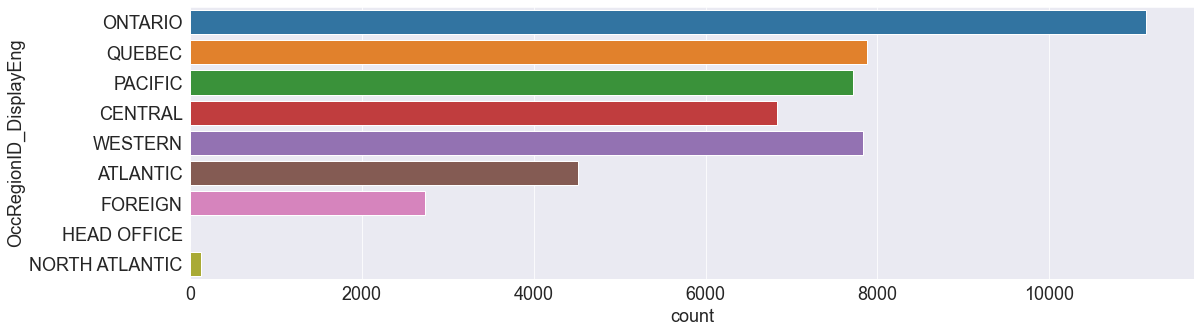

In [235]:
matplotlib.rcParams['figure.figsize'] = (18, 5)
column = 'OccRegionID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

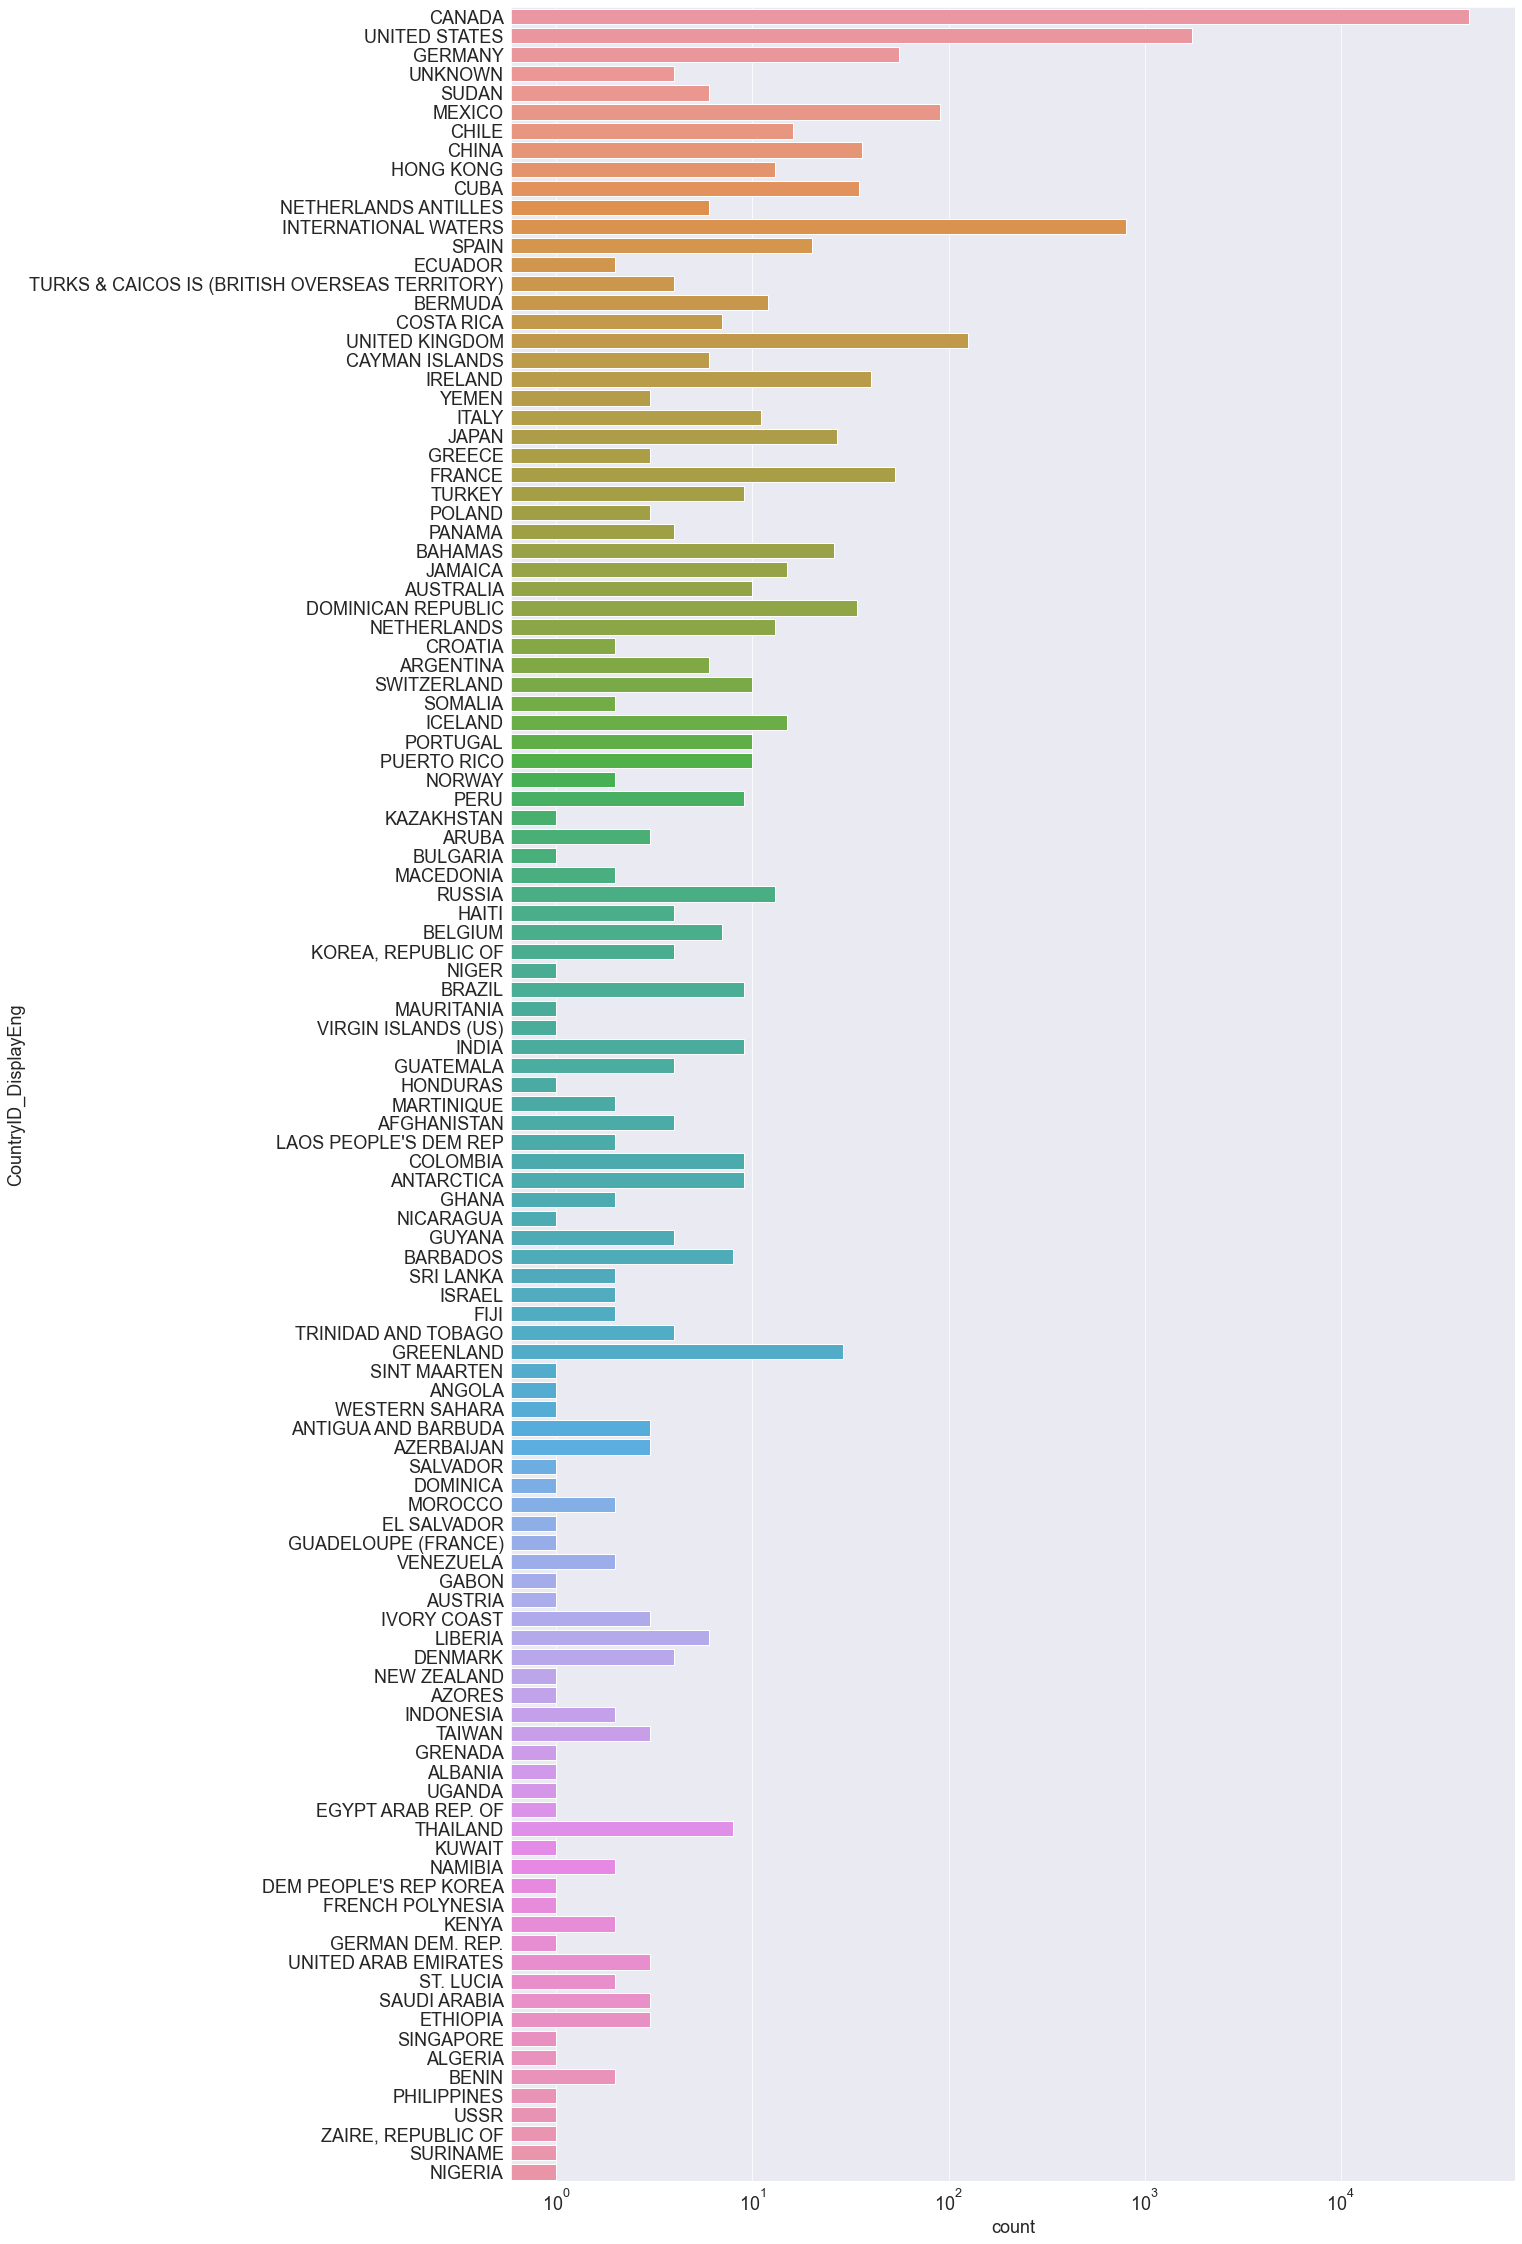

In [238]:
matplotlib.rcParams['figure.figsize'] = (18, 40)
column = 'CountryID_DisplayEng'
fig = sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));
fig.set_xscale('log')

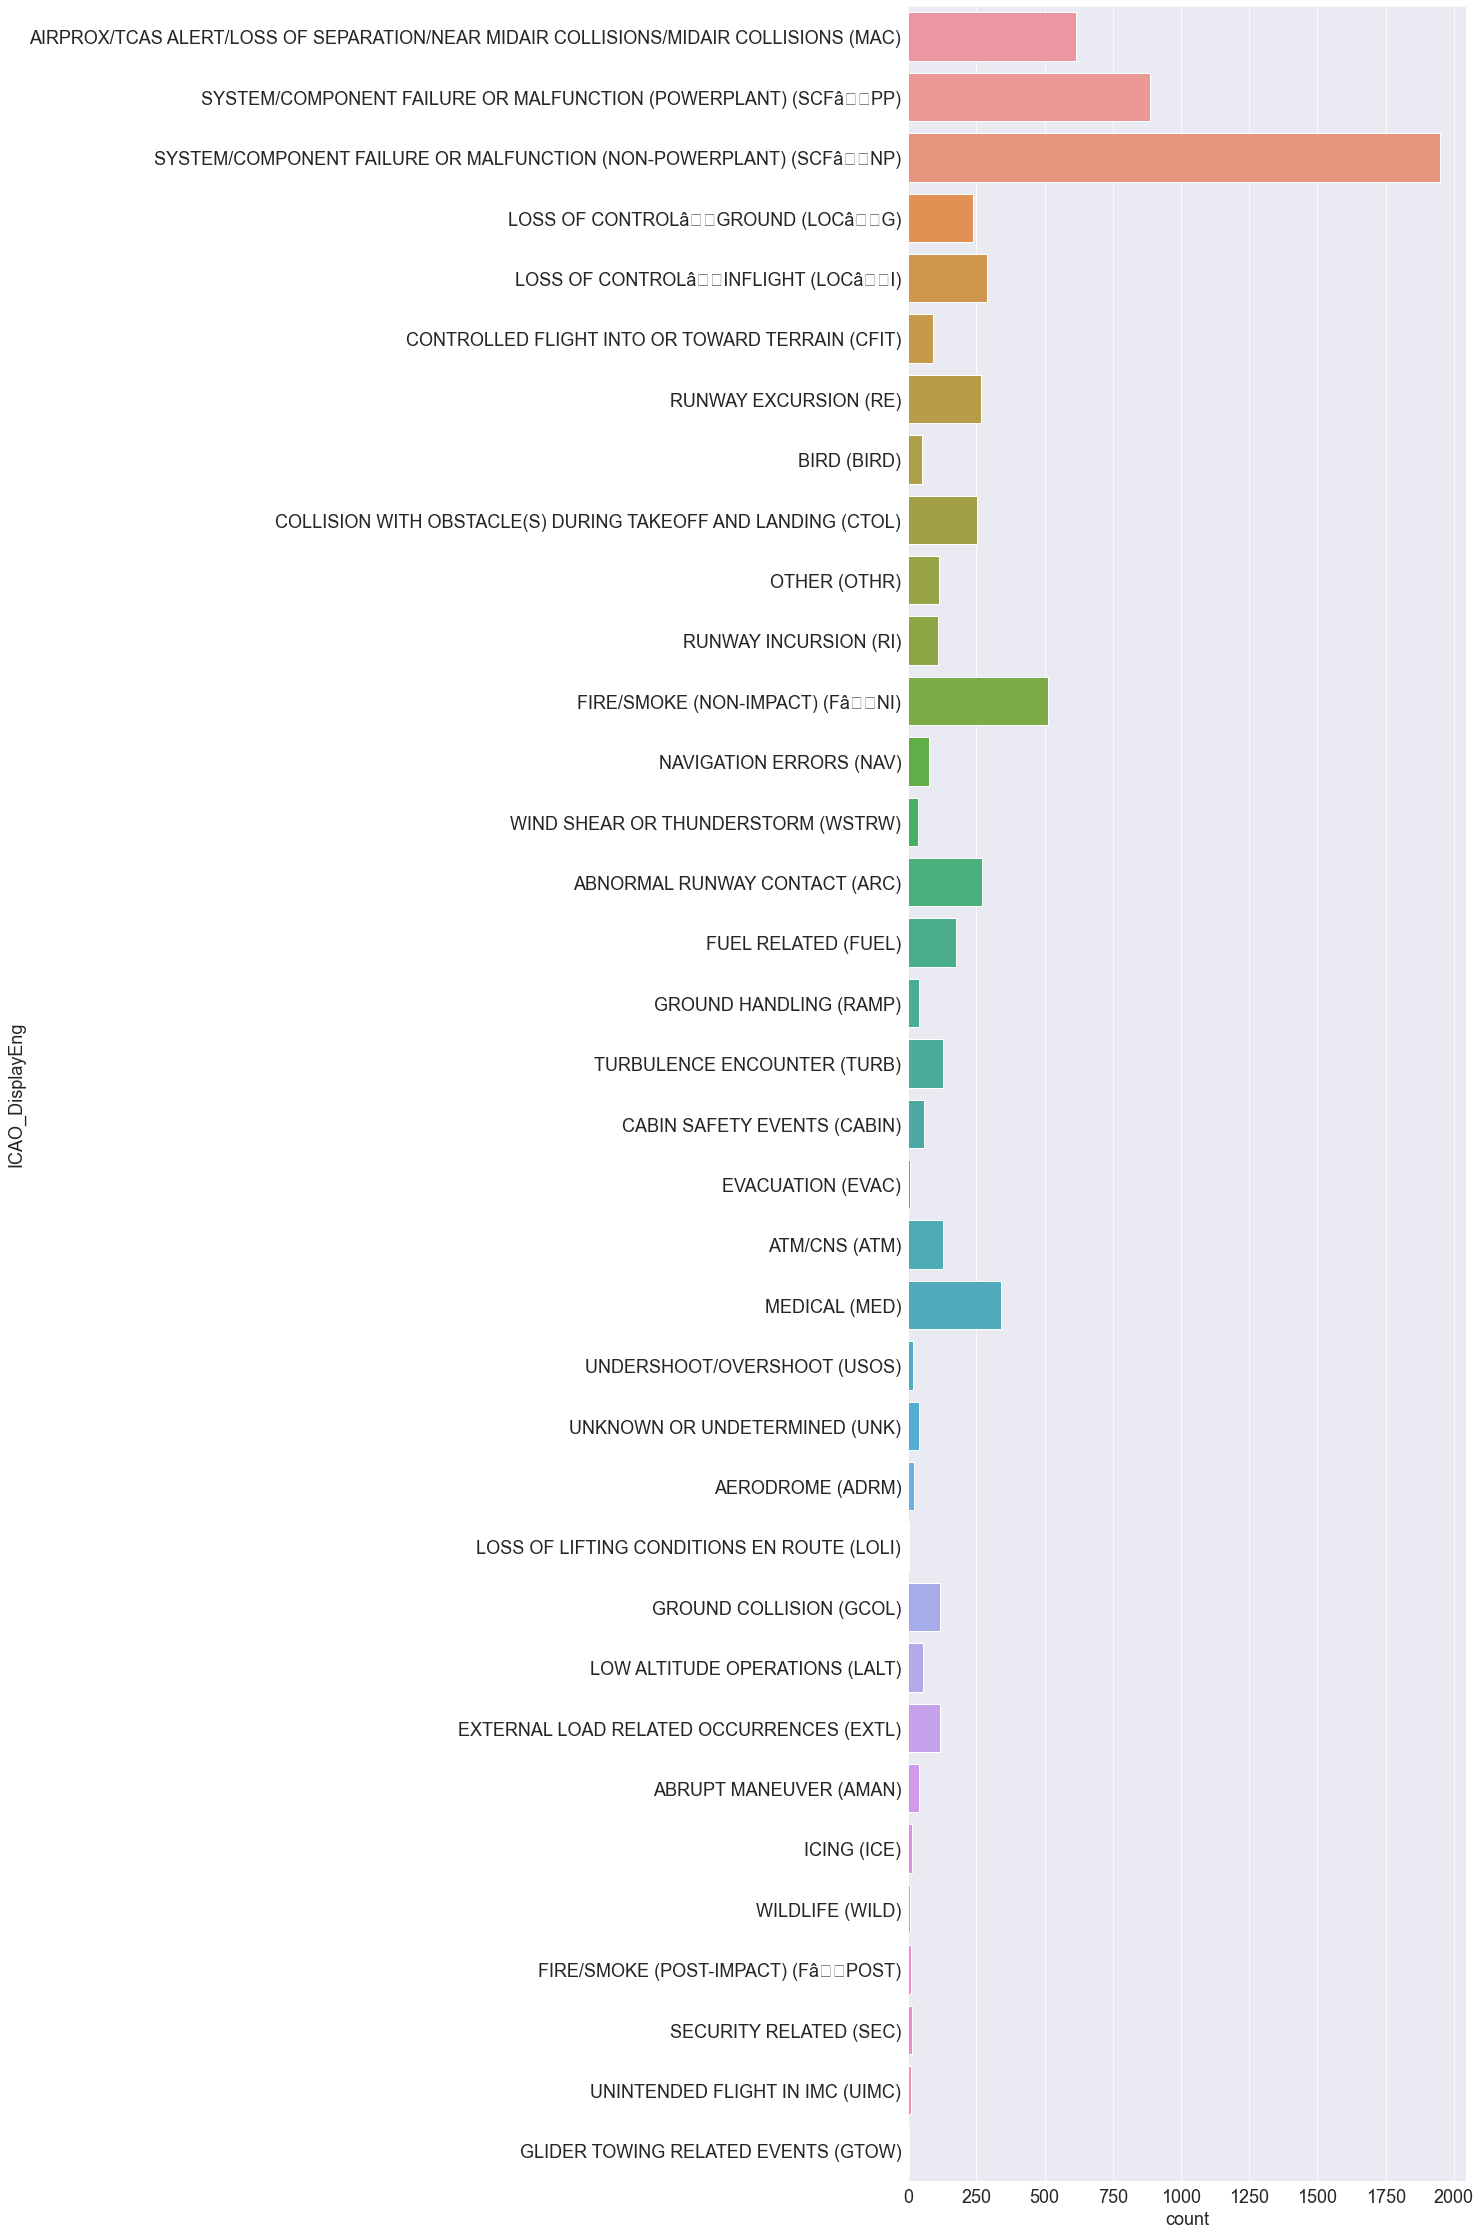

In [265]:
matplotlib.rcParams['figure.figsize'] = (10, 40)
column = 'ICAO_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

In [266]:
occurence_df['OccDate'] = pd.to_datetime(occurence_df['OccDate'])
occurence_df['OccYear'] = occurence_df['OccDate'].dt.year
occurence_df['OccMonth'] = occurence_df['OccDate'].dt.month
occurence_df['OccWeekday'] = occurence_df['OccDate'].dt.weekday


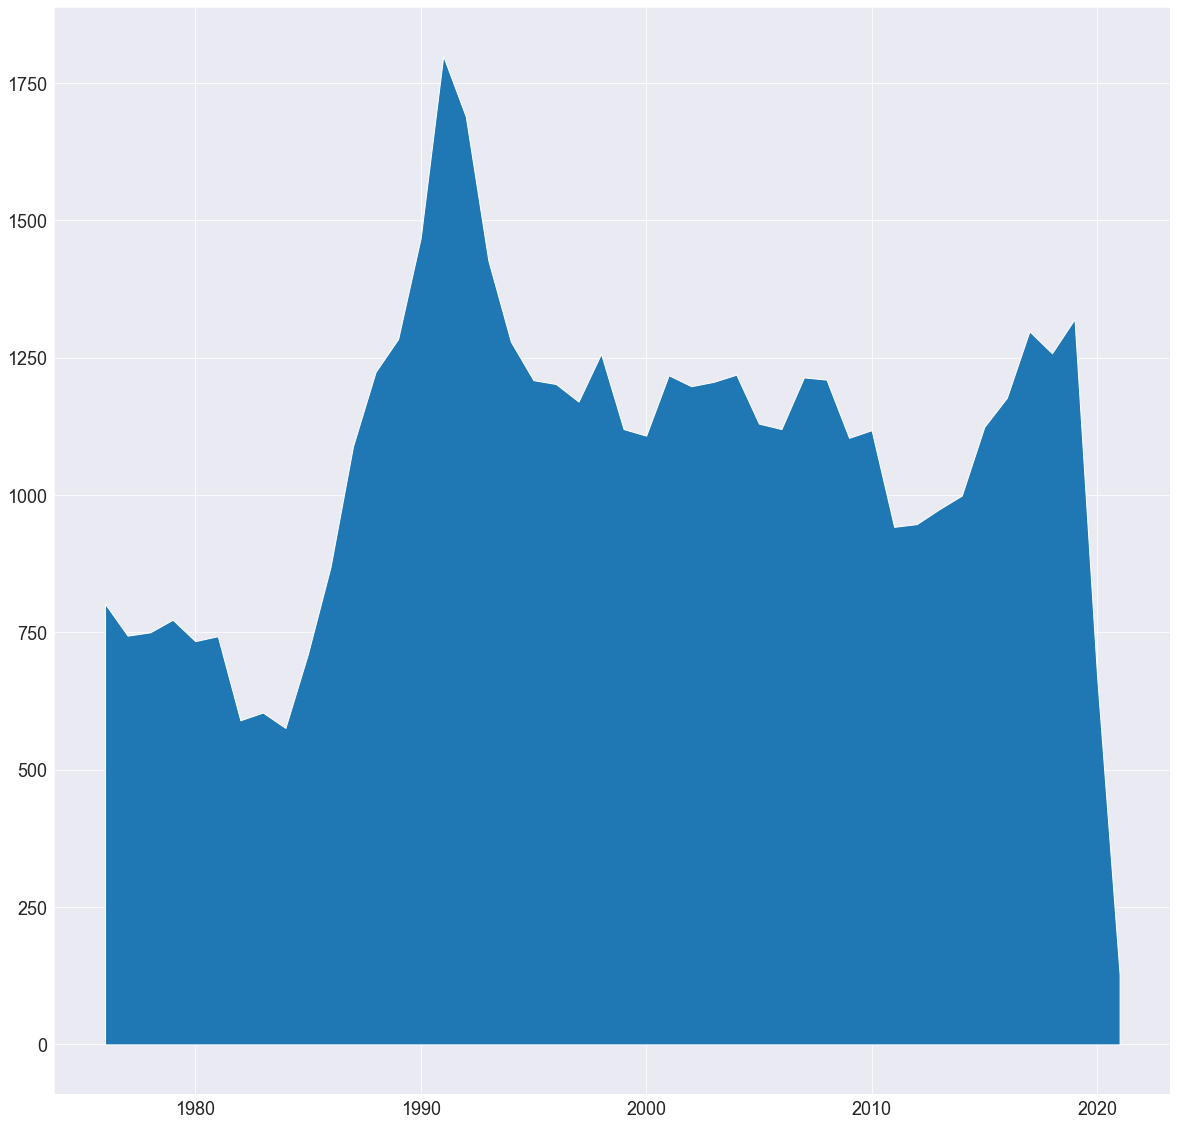

In [267]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['OccNo'].count()
plt.fill_between(data2.index, data2.values);

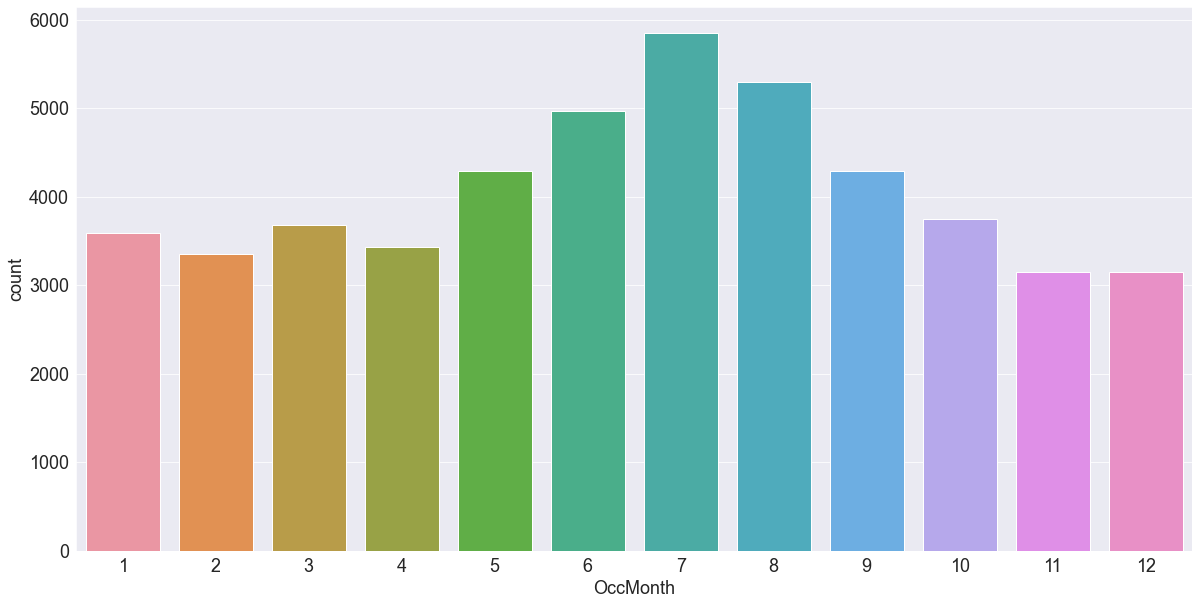

In [268]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccMonth'
sns.countplot(x=column, data = occurence_df.dropna(subset=[column]));

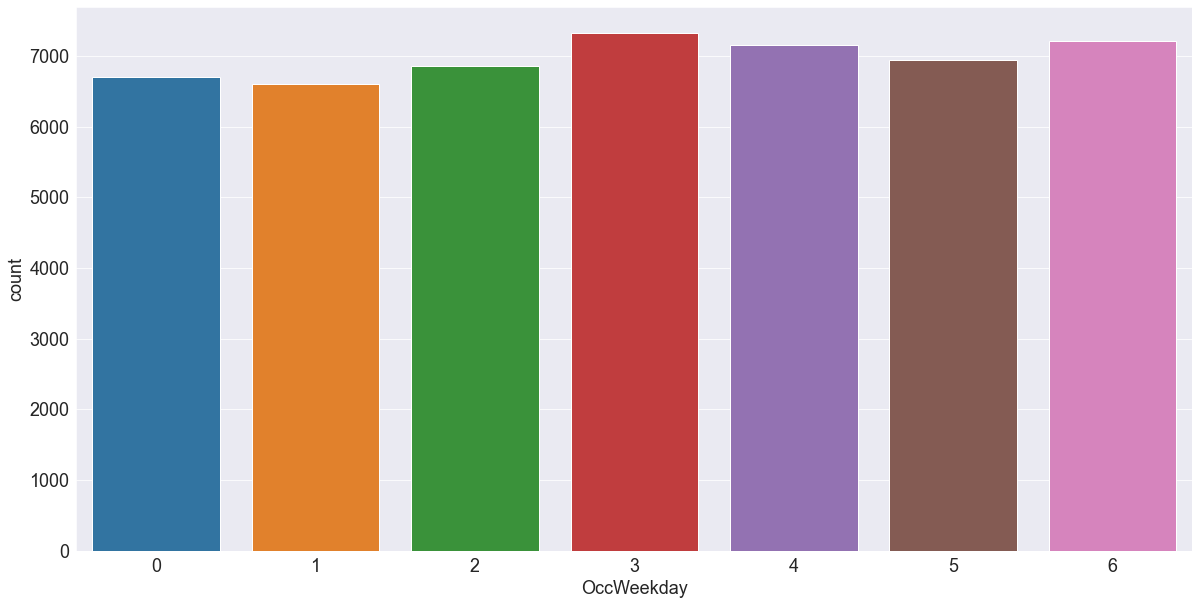

In [269]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccWeekday'
sns.countplot(x=column, data = occurence_df.dropna(subset=[column]));

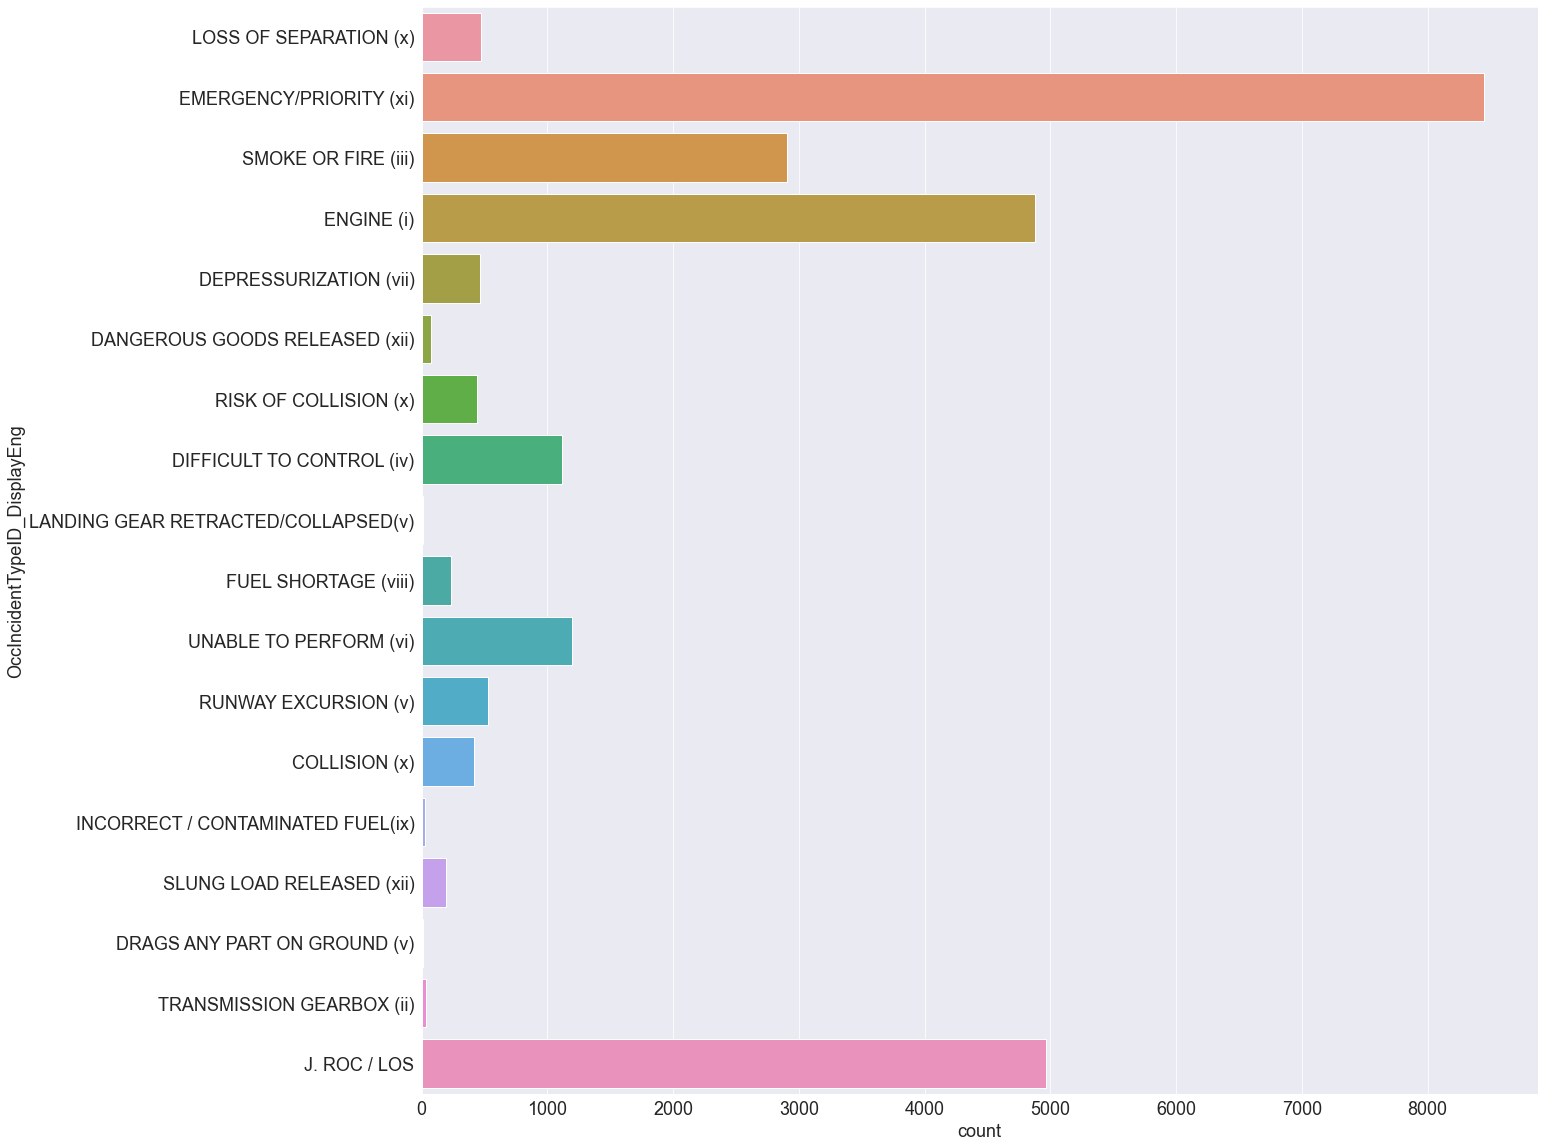

In [270]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'OccIncidentTypeID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

In [271]:
occurence_df['OccTime'] = pd.to_datetime(occurence_df['OccTime'])
occurence_df['OccHour'] = occurence_df['OccTime'].dt.hour
occurence_df['OccMinute'] = occurence_df['OccTime'].dt.minute

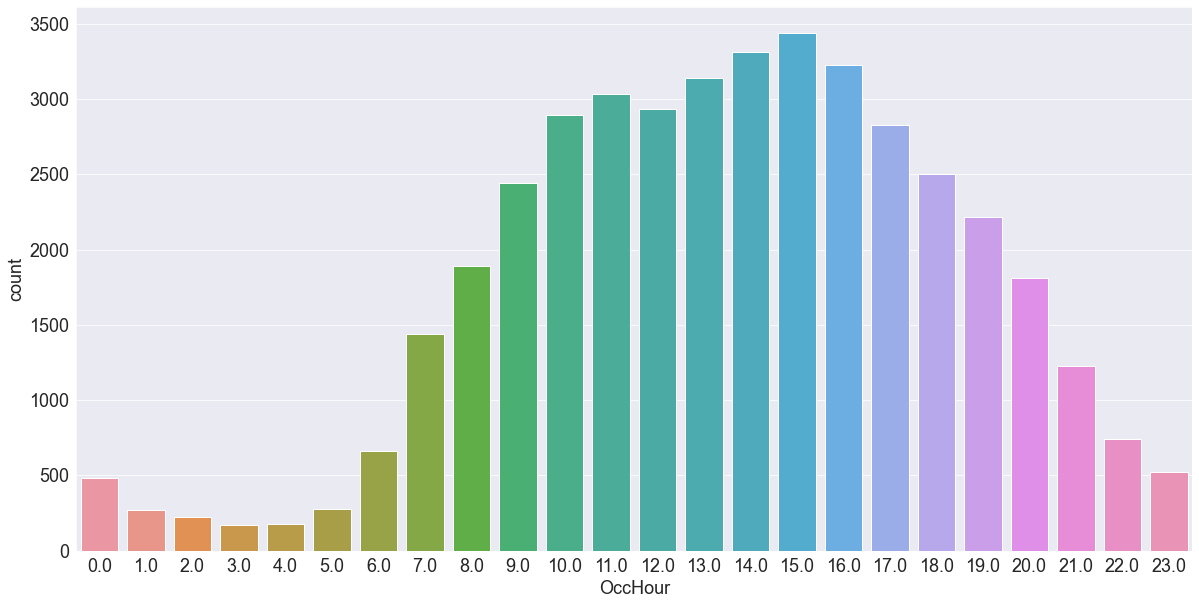

In [272]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccHour'
sns.countplot(x=column, data = occurence_df[occurence_df['TimeZoneID_DisplayEng'] !='UTC'].dropna(subset=[column]));

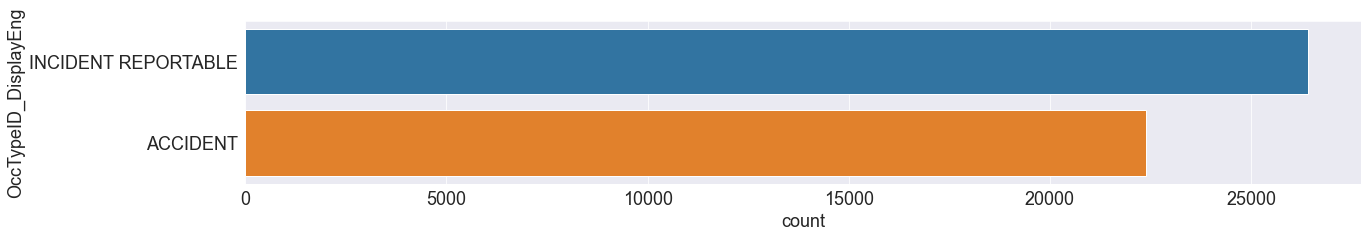

In [274]:
matplotlib.rcParams['figure.figsize'] = (20, 3)
column = 'OccTypeID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

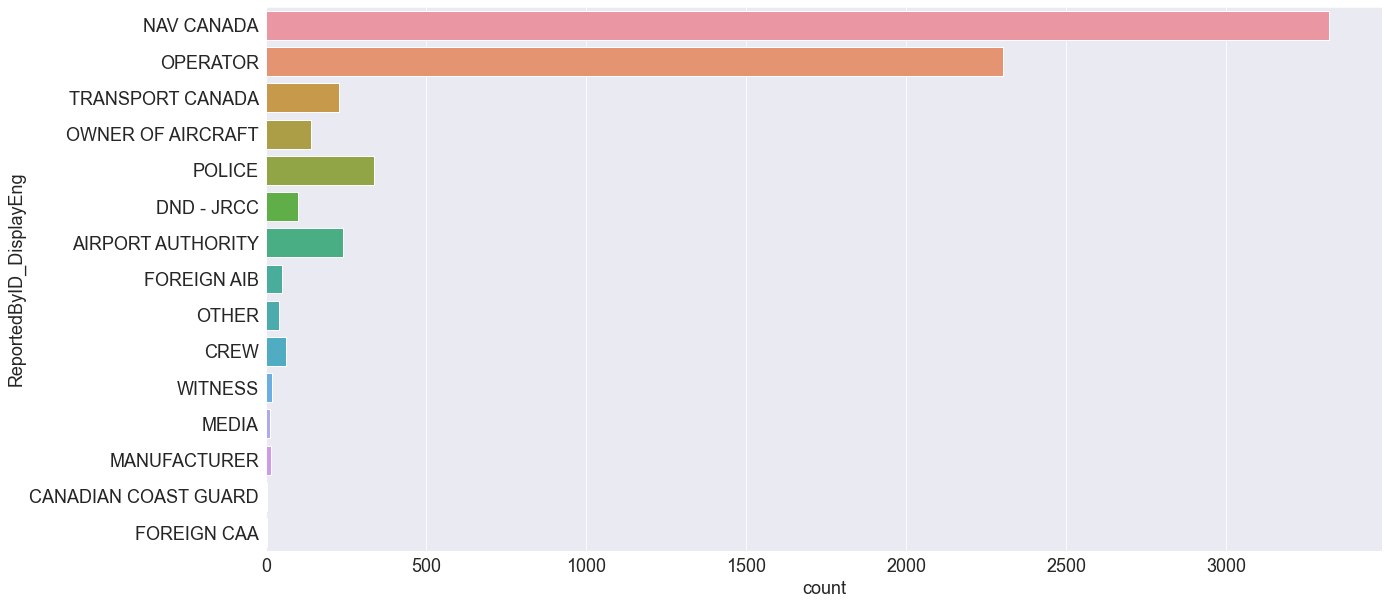

In [276]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'ReportedByID_DisplayEng'
sns.countplot(y=column, data = occurence_df[occurence_df[column]!='UNKNOWN'].dropna(subset=[column]));

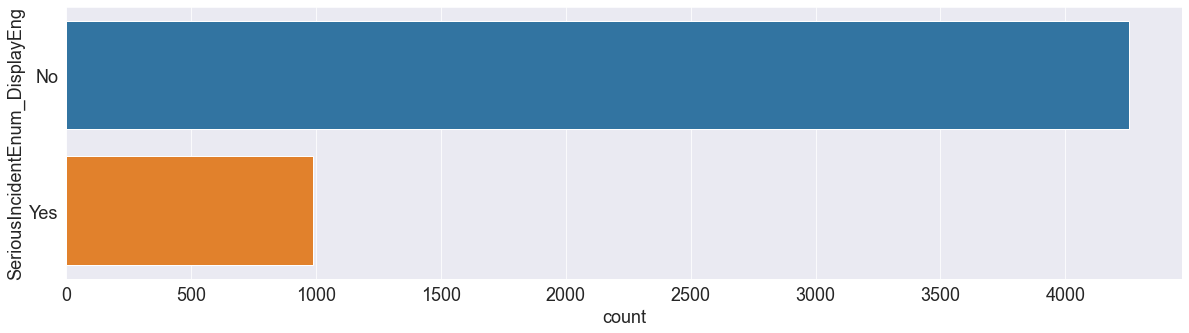

In [277]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'SeriousIncidentEnum_DisplayEng'
sns.countplot(y=column, data = occurence_df[occurence_df[column]!='Unknown'].dropna(subset=[column]));

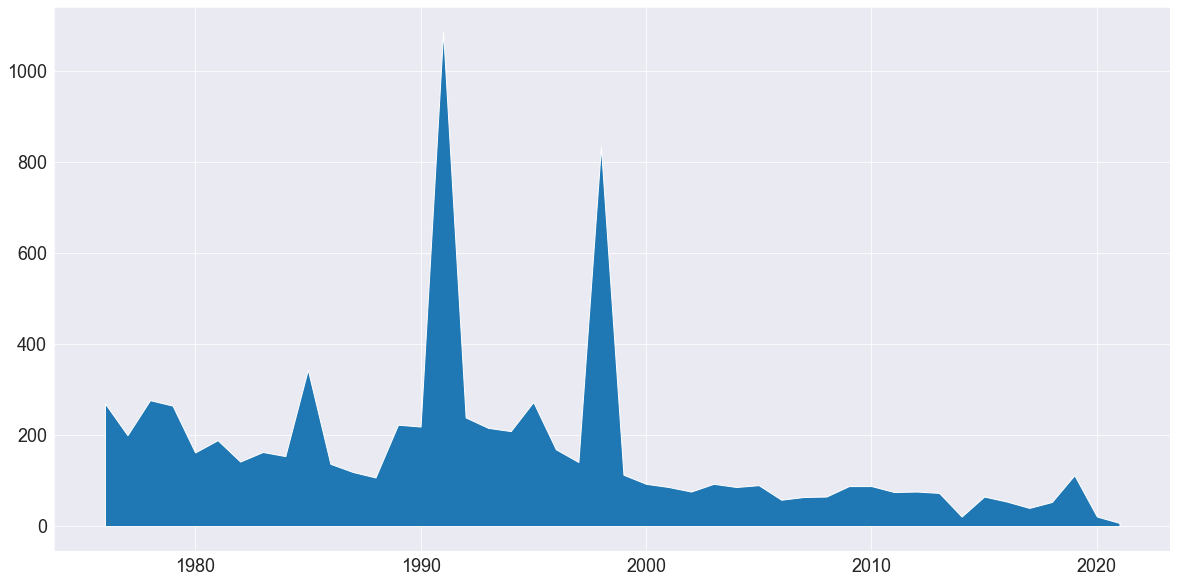

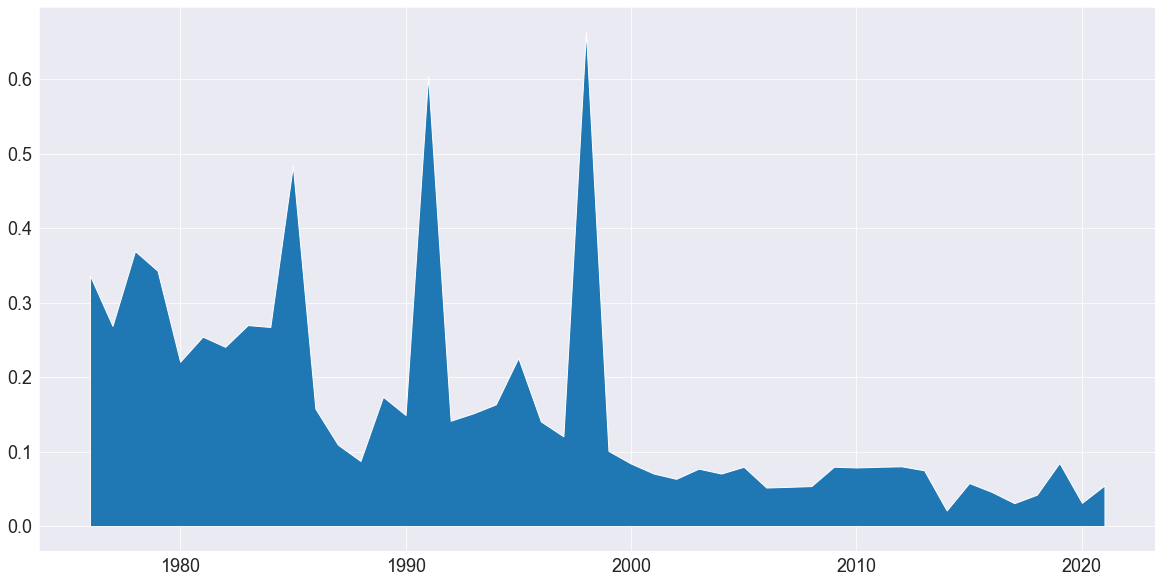

In [296]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['TotalFatalCount'].sum()
plt.fill_between(data2.index, data2.values);
plt.figure()
data3= data.groupby(column)['TotalFatalCount'].mean()
plt.fill_between(data3.index, data3.values);

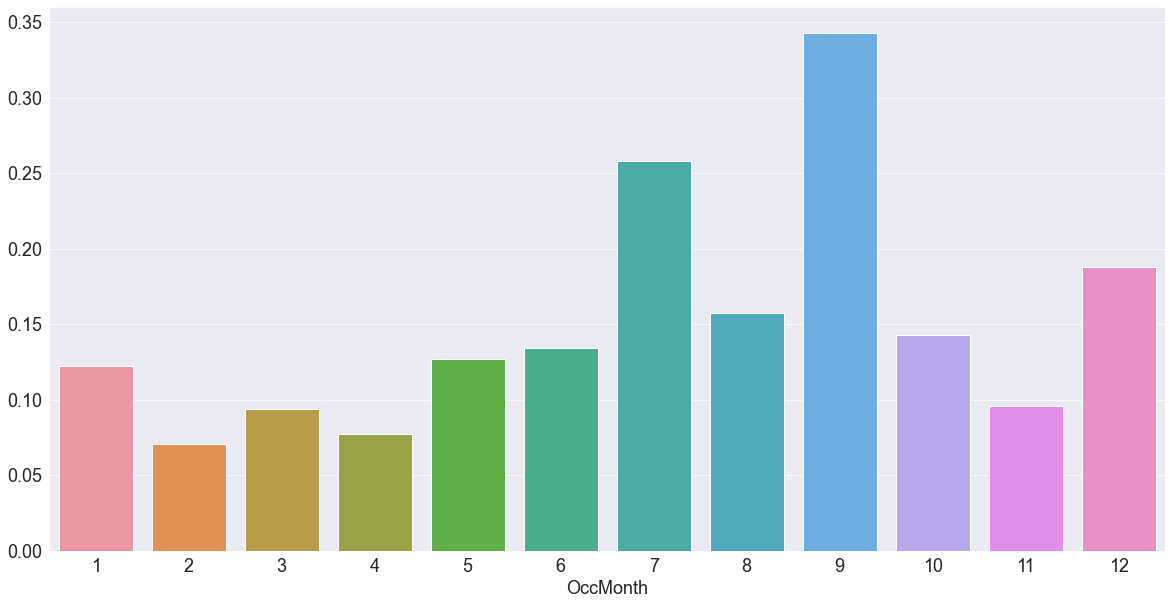

In [298]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccMonth').TotalFatalCount.mean()
sns.barplot(x = data.index, y = data.values);

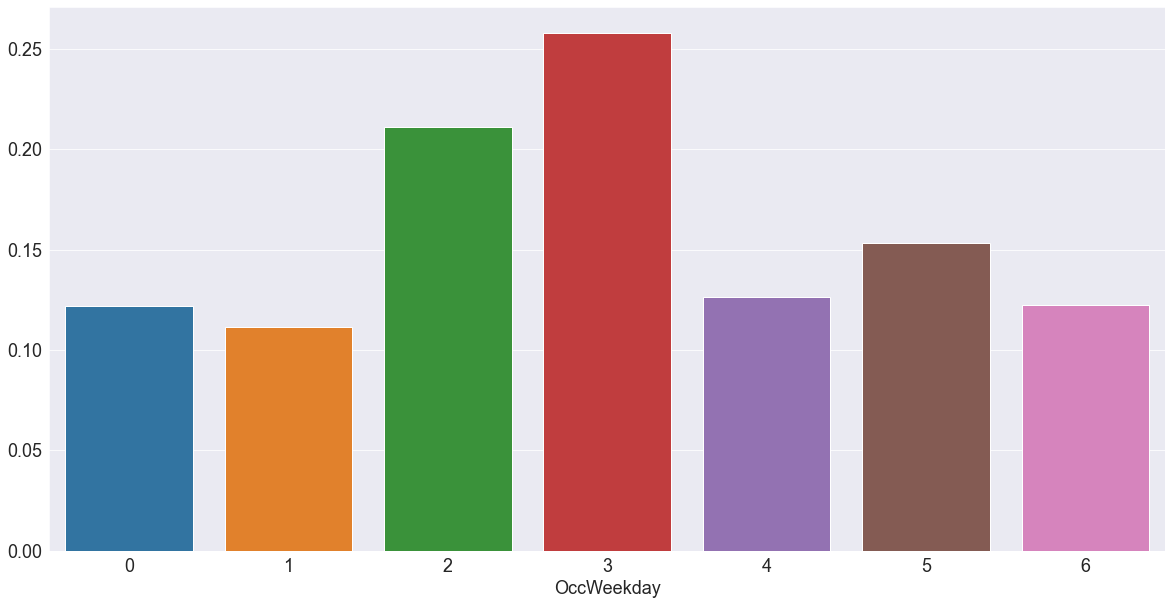

In [23]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccWeekday').TotalFatalCount.mean()
sns.barplot(x = data.index, y = data.values);

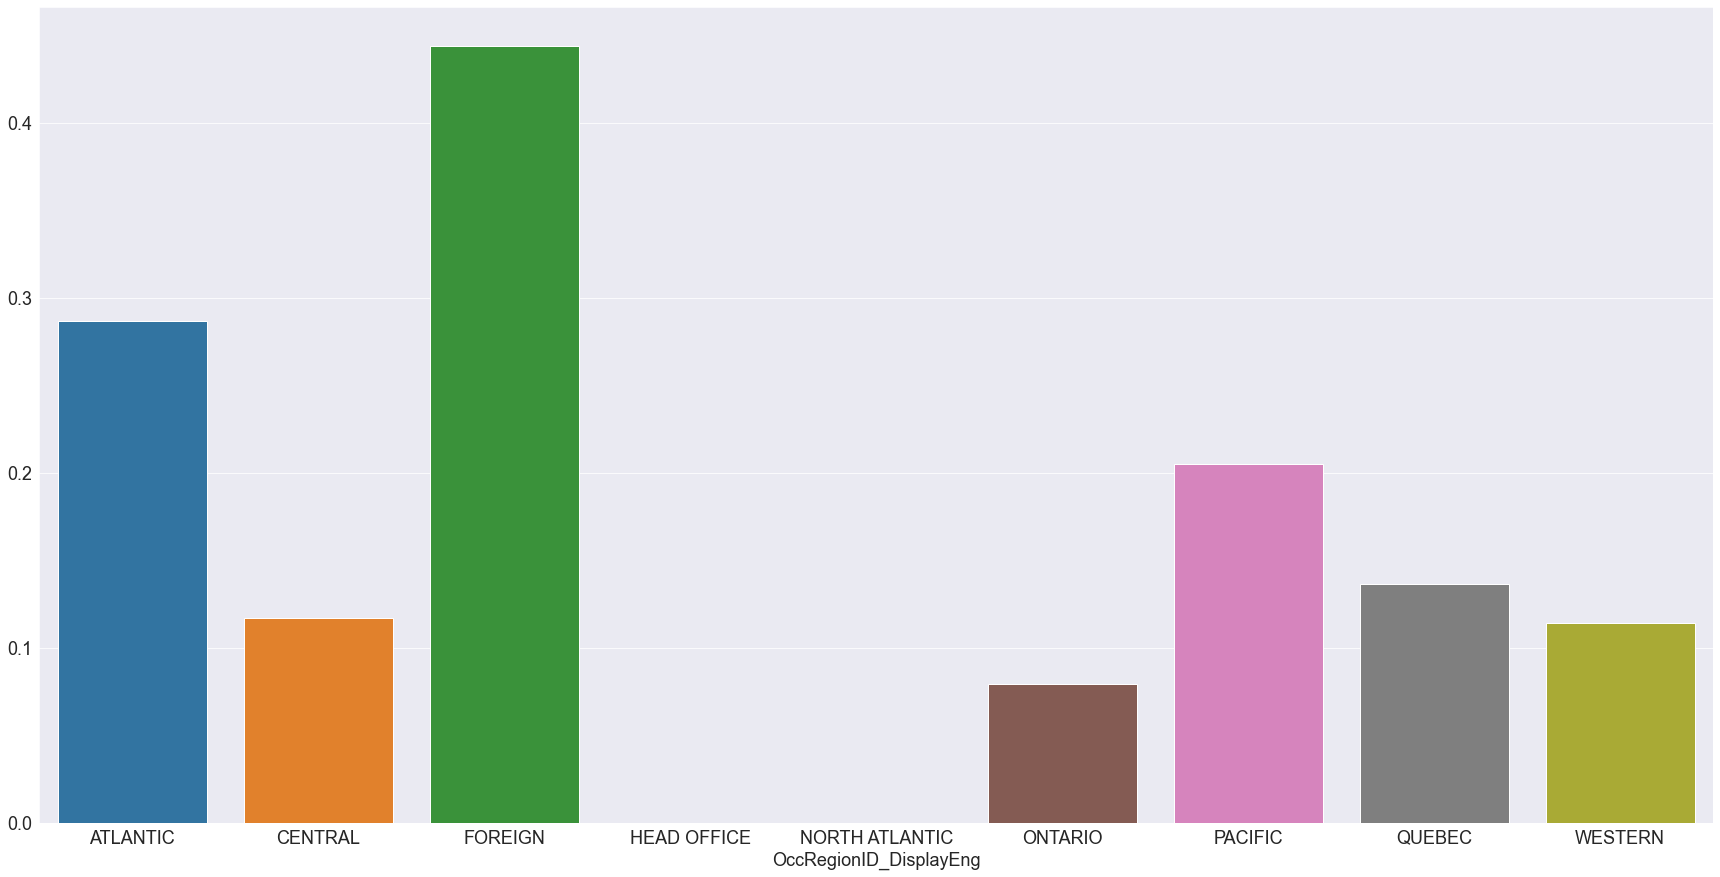

In [24]:
matplotlib.rcParams['figure.figsize'] = (30, 15)
data = occurence_df.groupby('OccRegionID_DisplayEng').TotalFatalCount.mean()
sns.barplot(x = data.index, y = data.values);

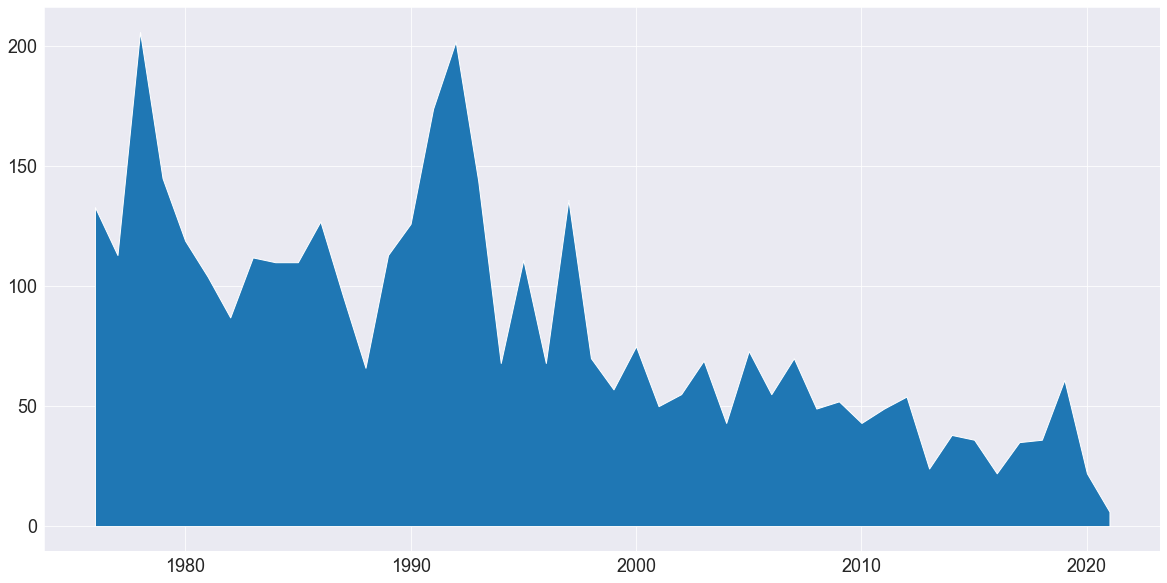

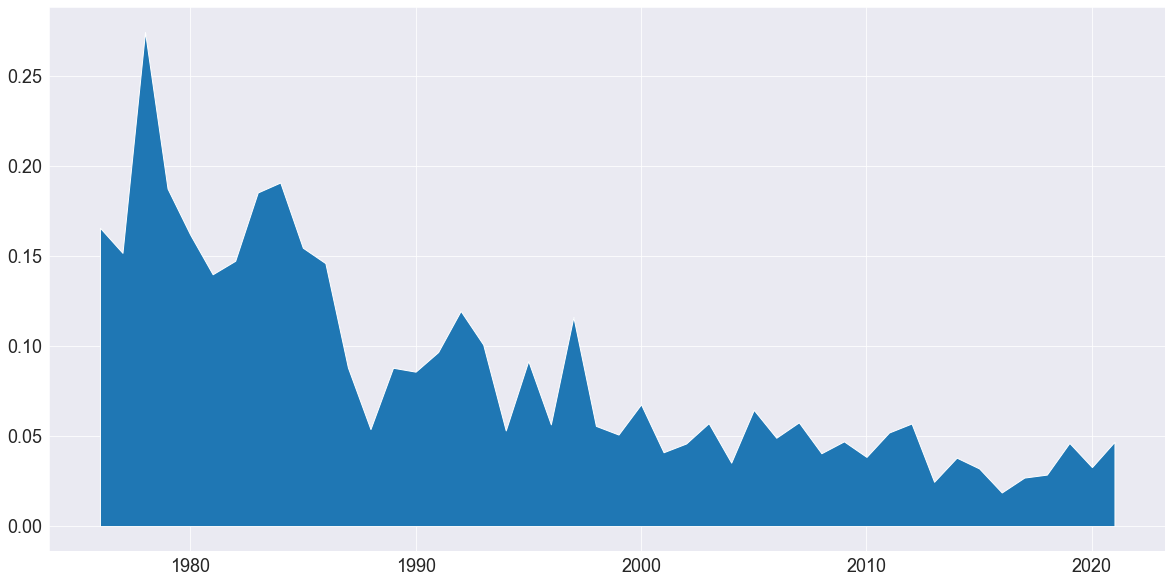

In [299]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['TotalSeriousCount'].sum()
plt.fill_between(data2.index, data2.values);
plt.figure()
data3= data.groupby(column)['TotalSeriousCount'].mean()
plt.fill_between(data3.index, data3.values);

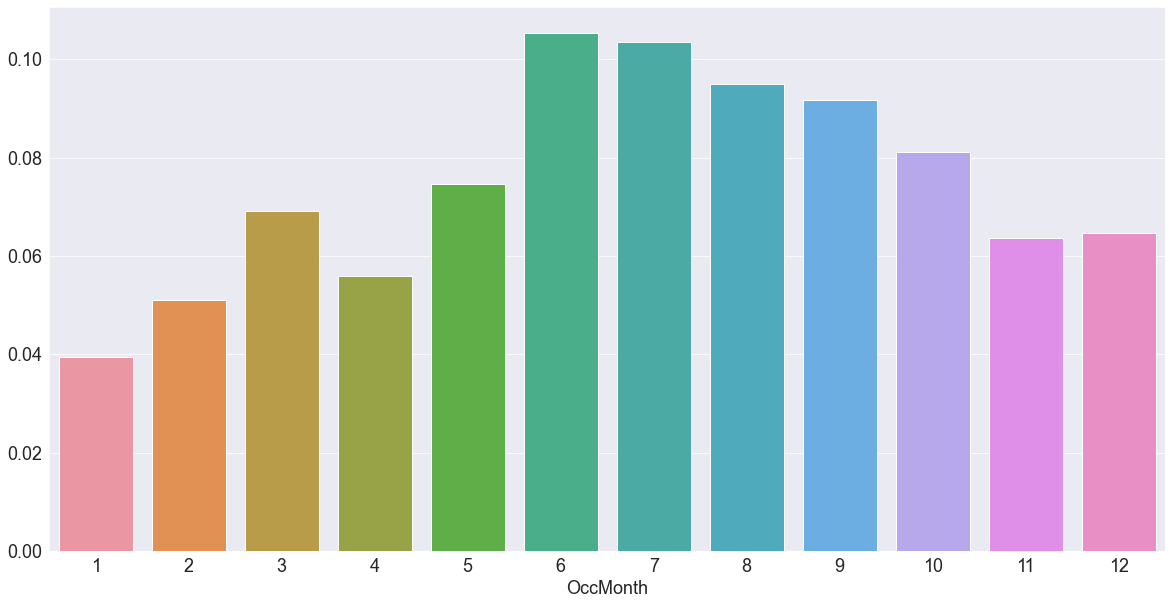

In [300]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccMonth').TotalSeriousCount.mean()
sns.barplot(x = data.index, y = data.values);

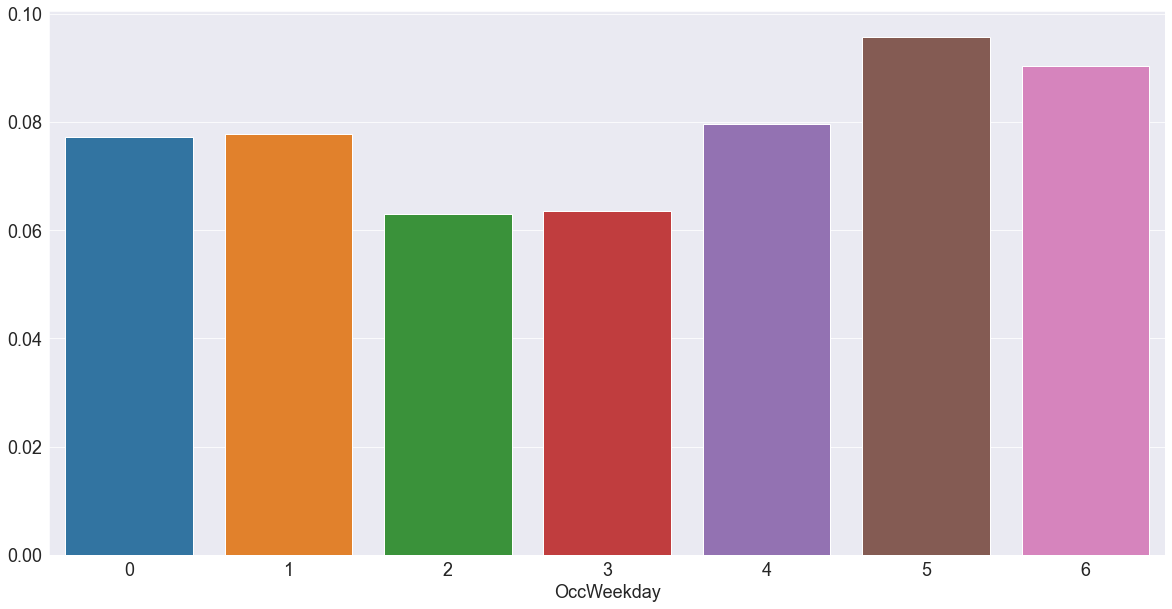

In [27]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccWeekday').TotalSeriousCount.mean()
sns.barplot(x = data.index, y = data.values);

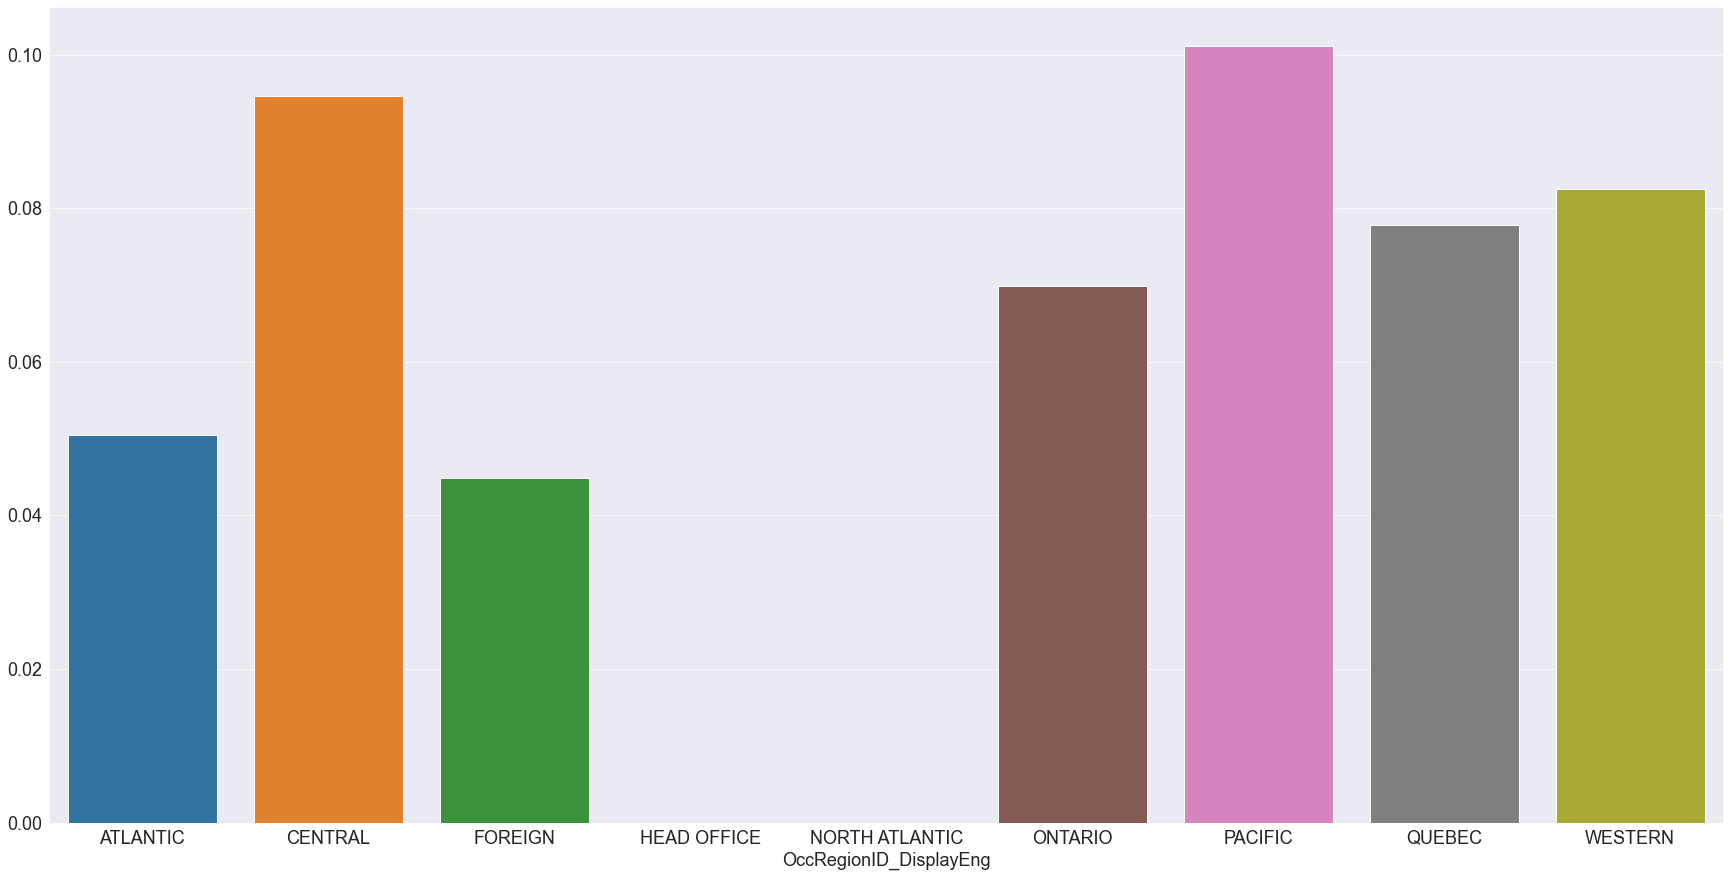

In [28]:
matplotlib.rcParams['figure.figsize'] = (30, 15)
data = occurence_df.groupby('OccRegionID_DisplayEng').TotalSeriousCount.mean()
sns.barplot(x = data.index, y = data.values);

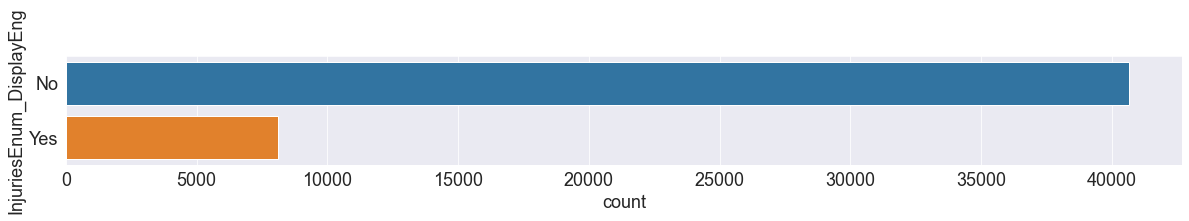

In [302]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'InjuriesEnum_DisplayEng'
sns.countplot(y=column, data = occurence_df[occurence_df[column]!='Unknown'].dropna(subset=[column]));

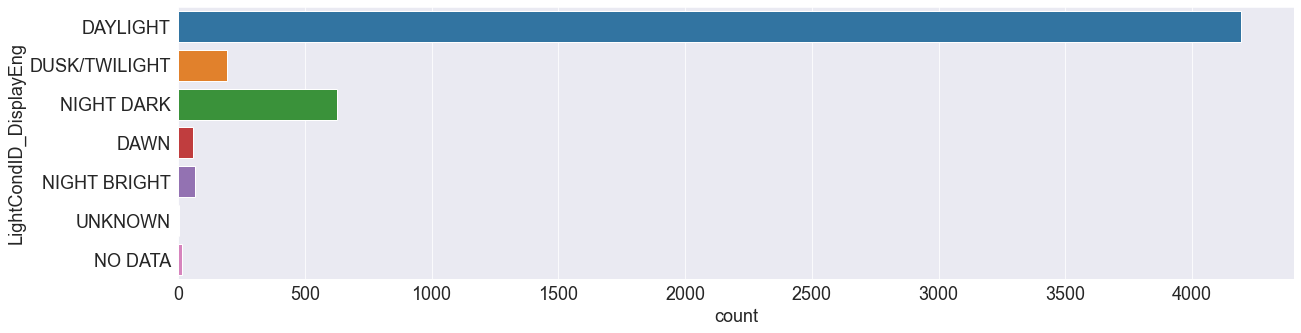

In [306]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'LightCondID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]) );

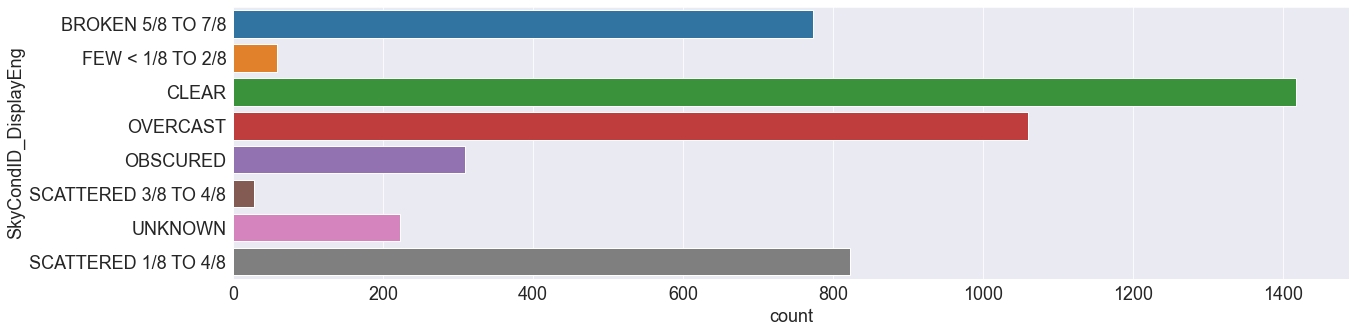

In [307]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'SkyCondID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

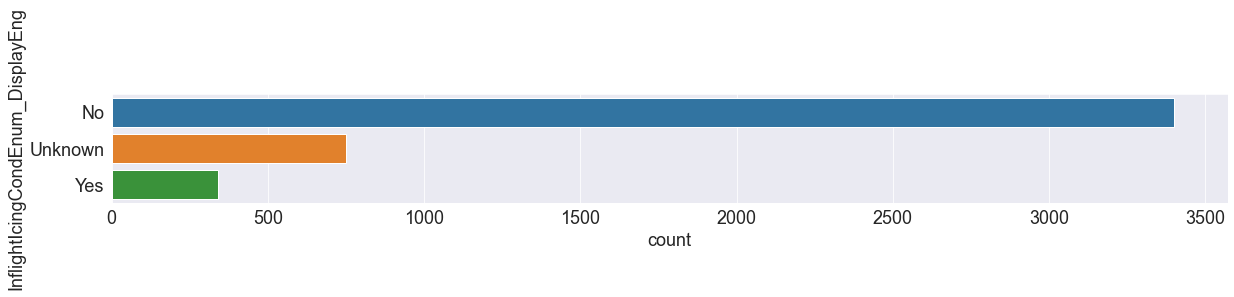

In [308]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'InflightIcingCondEnum_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

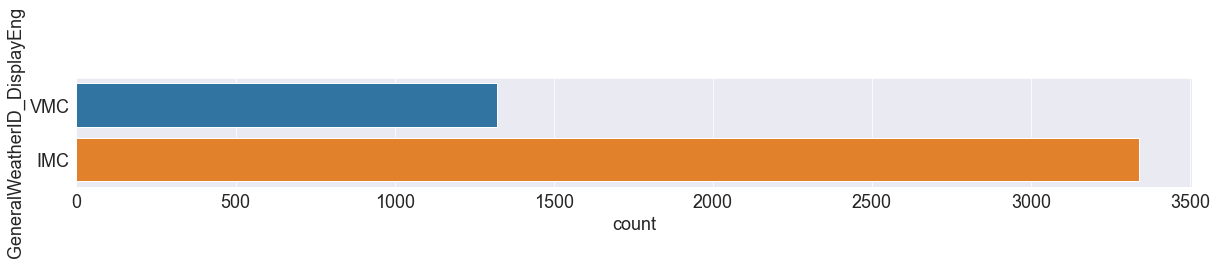

In [314]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'GeneralWeatherID_DisplayEng'
sns.countplot(y=column, data = occurence_df[occurence_df[column]!='UNKNOWN'].dropna(subset=[column]));

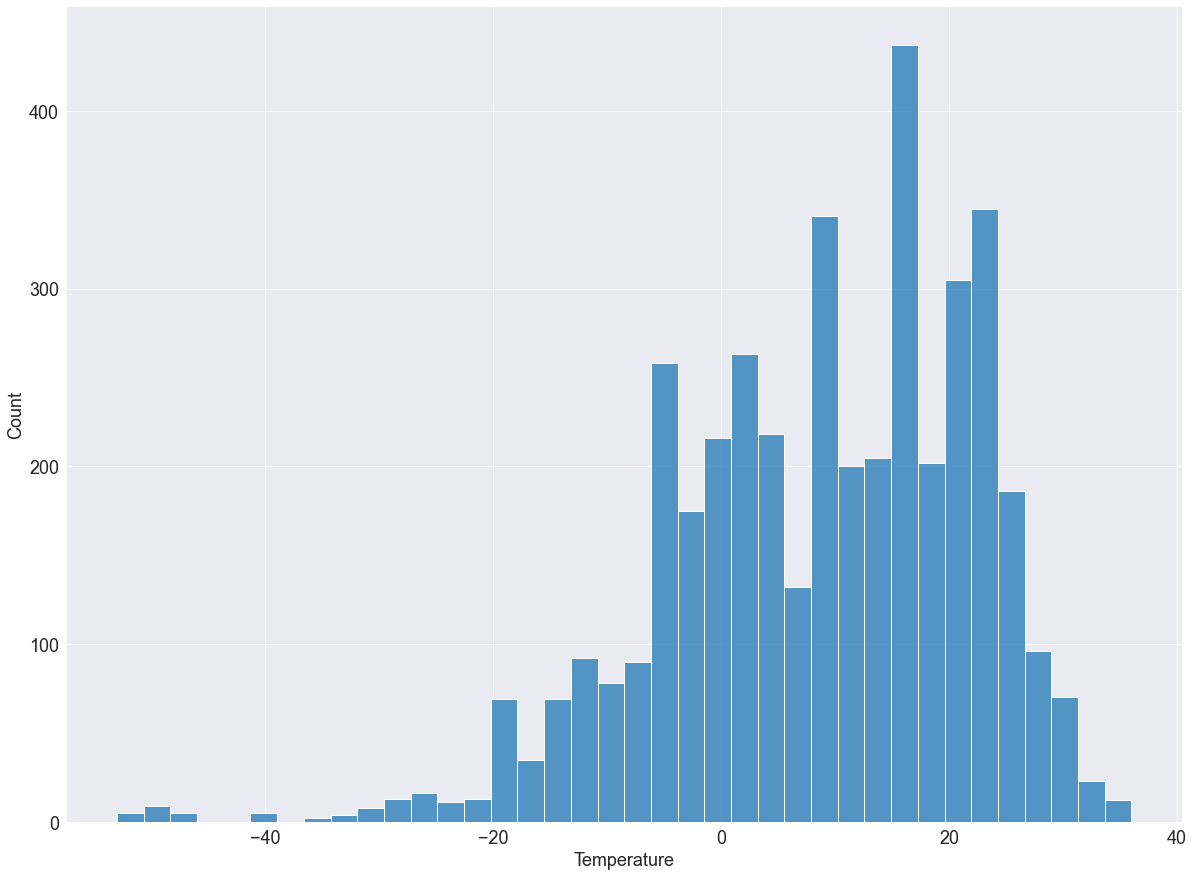

In [313]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'Temperature'
sns.histplot(x=column, data = occurence_df.dropna(subset=[column]));

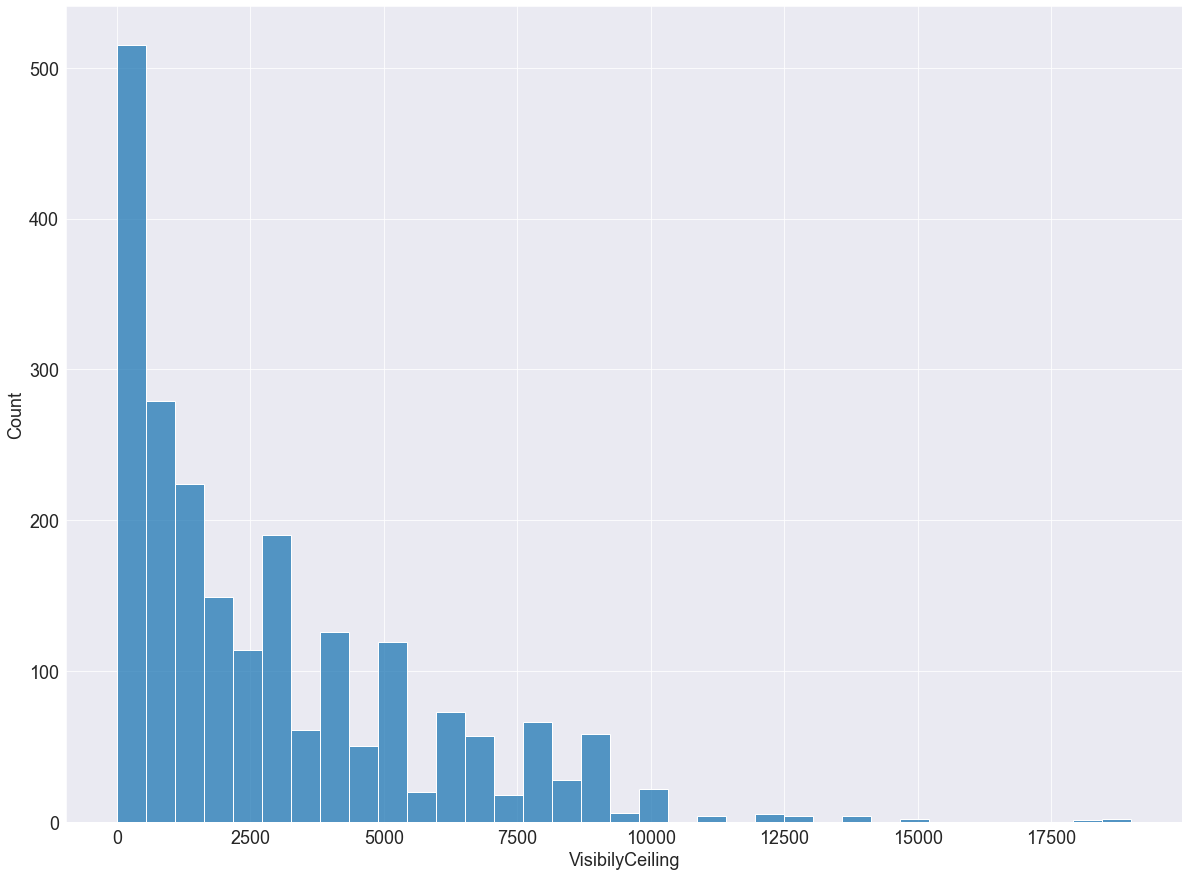

In [315]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'VisibilyCeiling'
sns.histplot(x=column, data = occurence_df[occurence_df['VisibilyCeiling']<20000].dropna(subset=[column]));

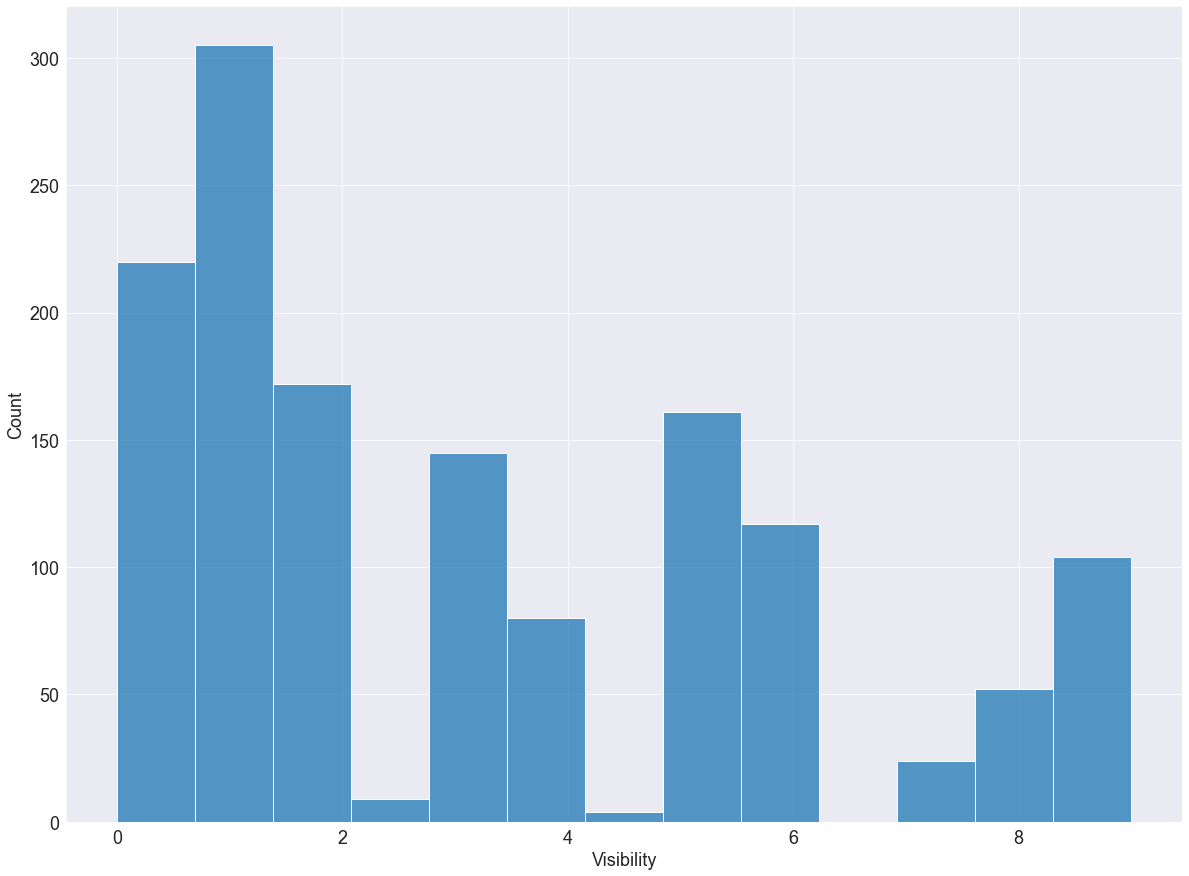

In [319]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'Visibility'
sns.histplot(x=column, data = occurence_df[occurence_df['Visibility']<10].dropna(subset=[column]));

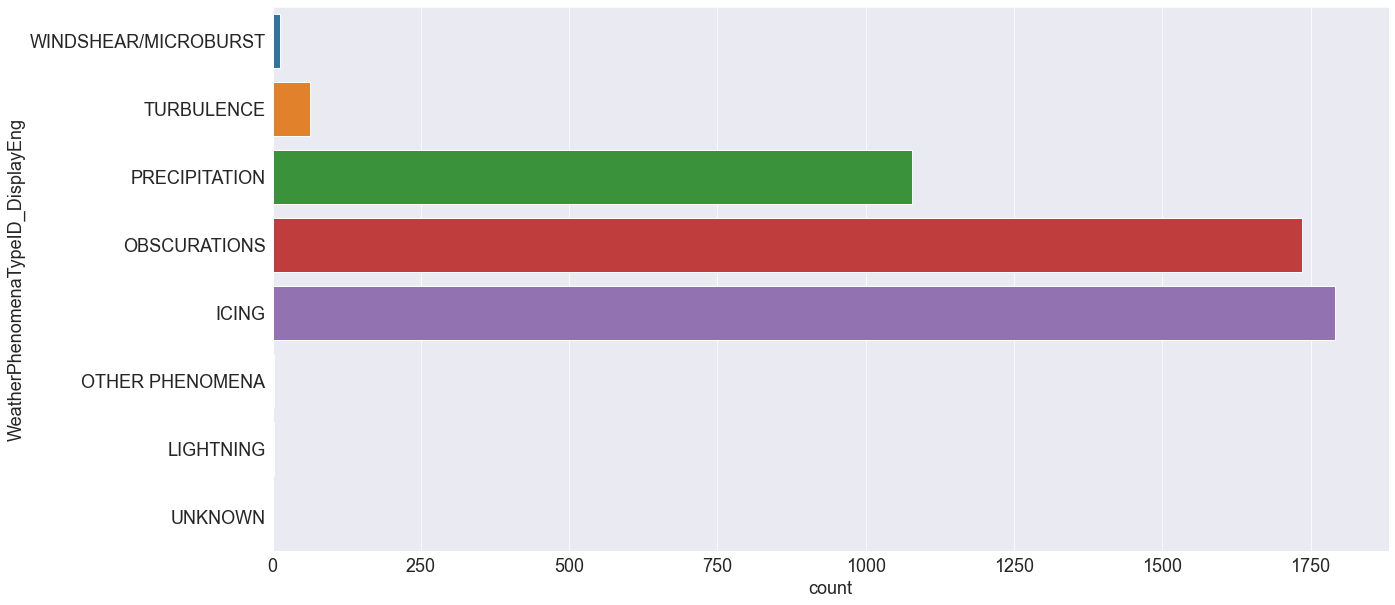

In [320]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'WeatherPhenomenaTypeID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

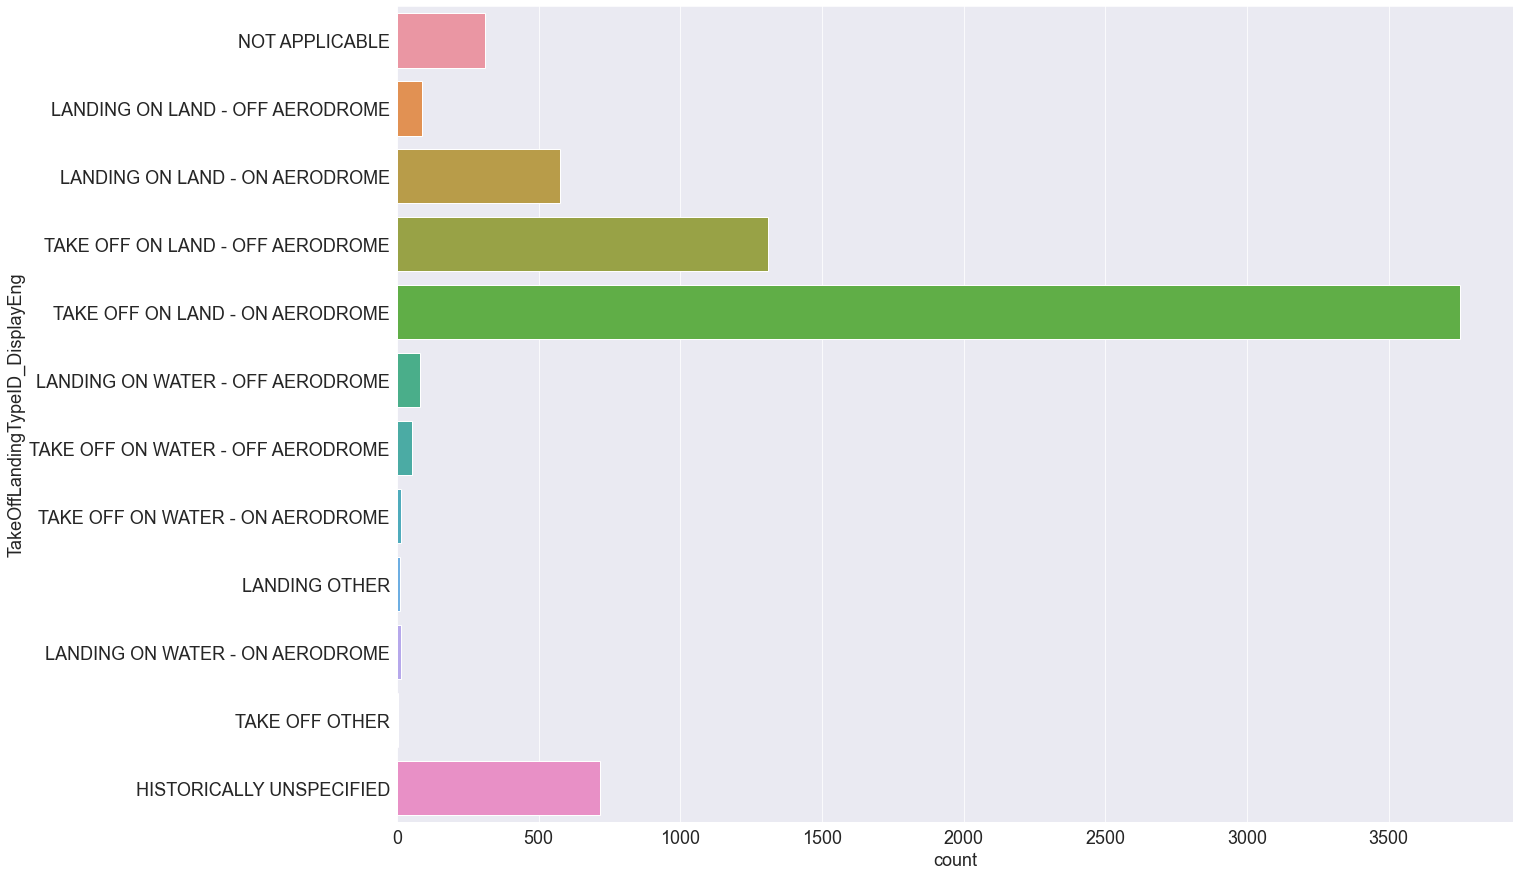

In [321]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'TakeOffLandingTypeID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

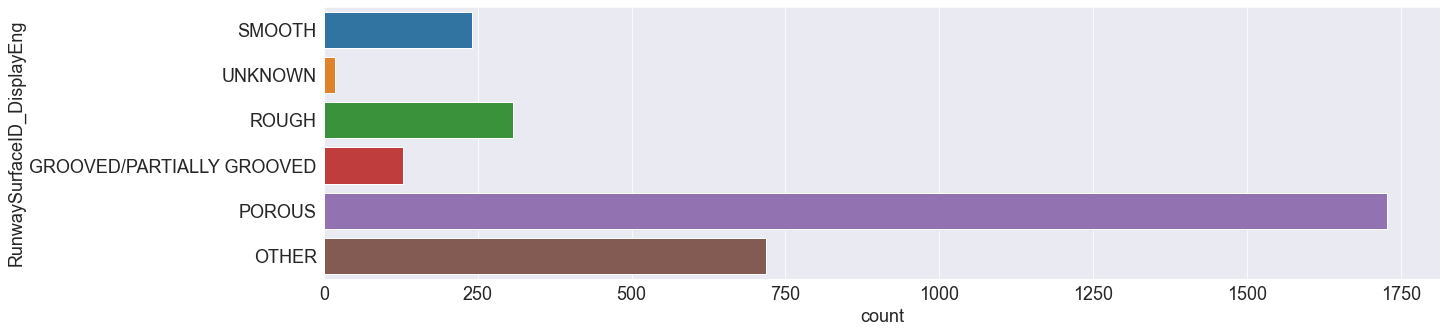

In [322]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'RunwaySurfaceID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

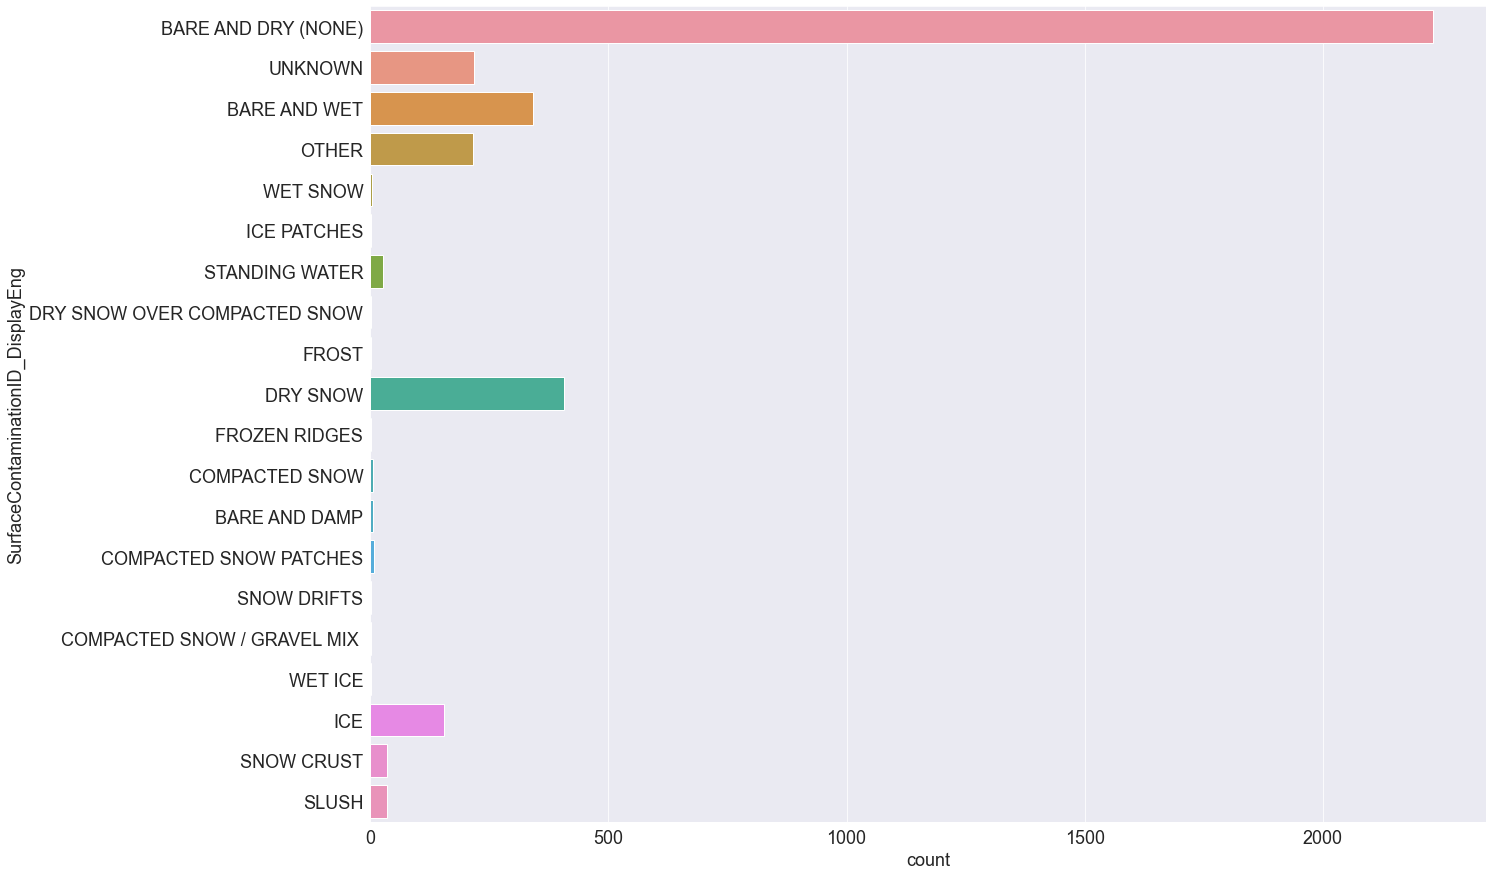

In [323]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'SurfaceContaminationID_DisplayEng'
sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));

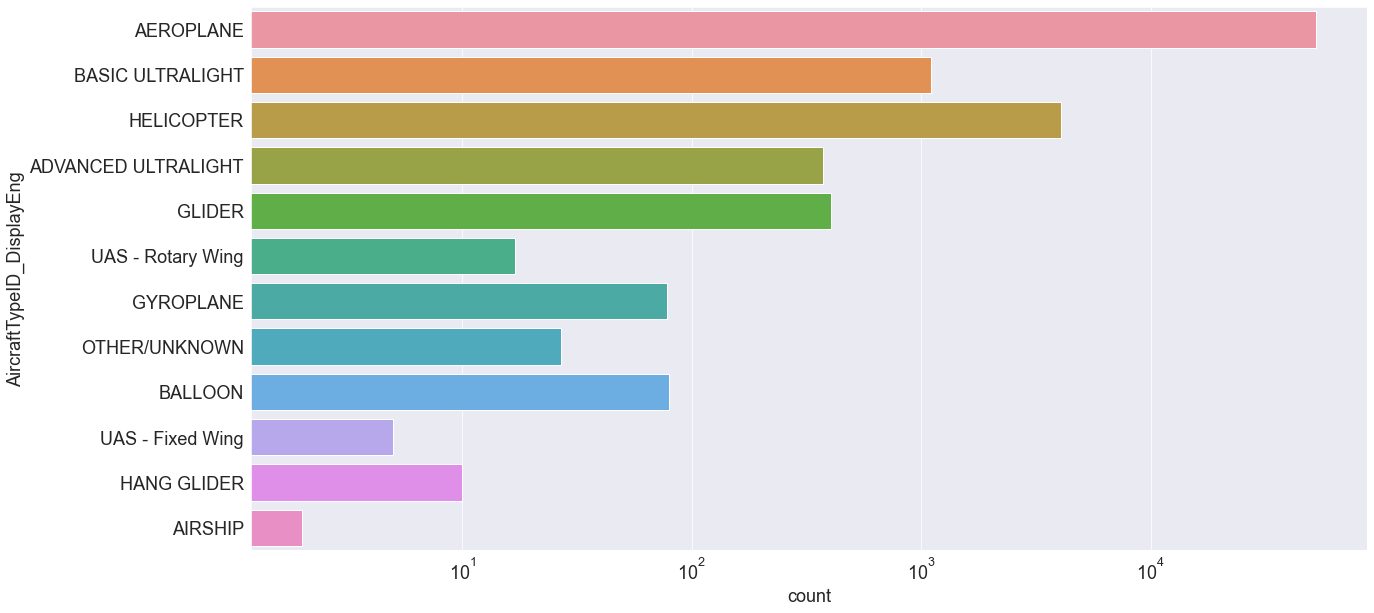

In [324]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'AircraftTypeID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));
fig.set_xscale("log")

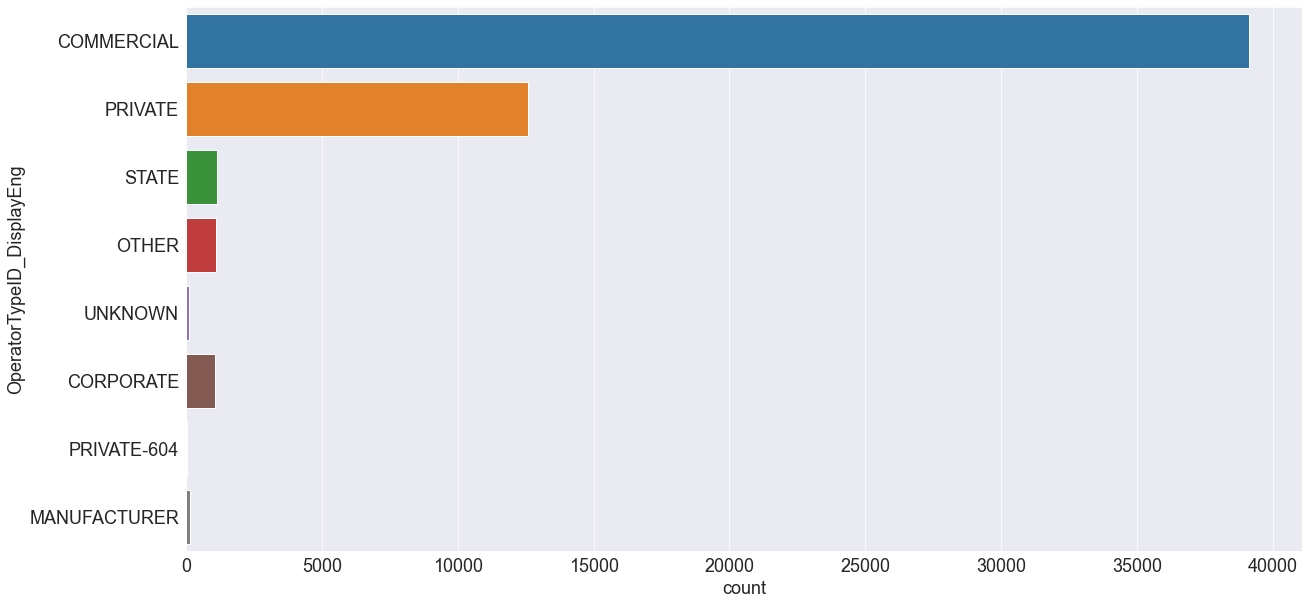

In [325]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OperatorTypeID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

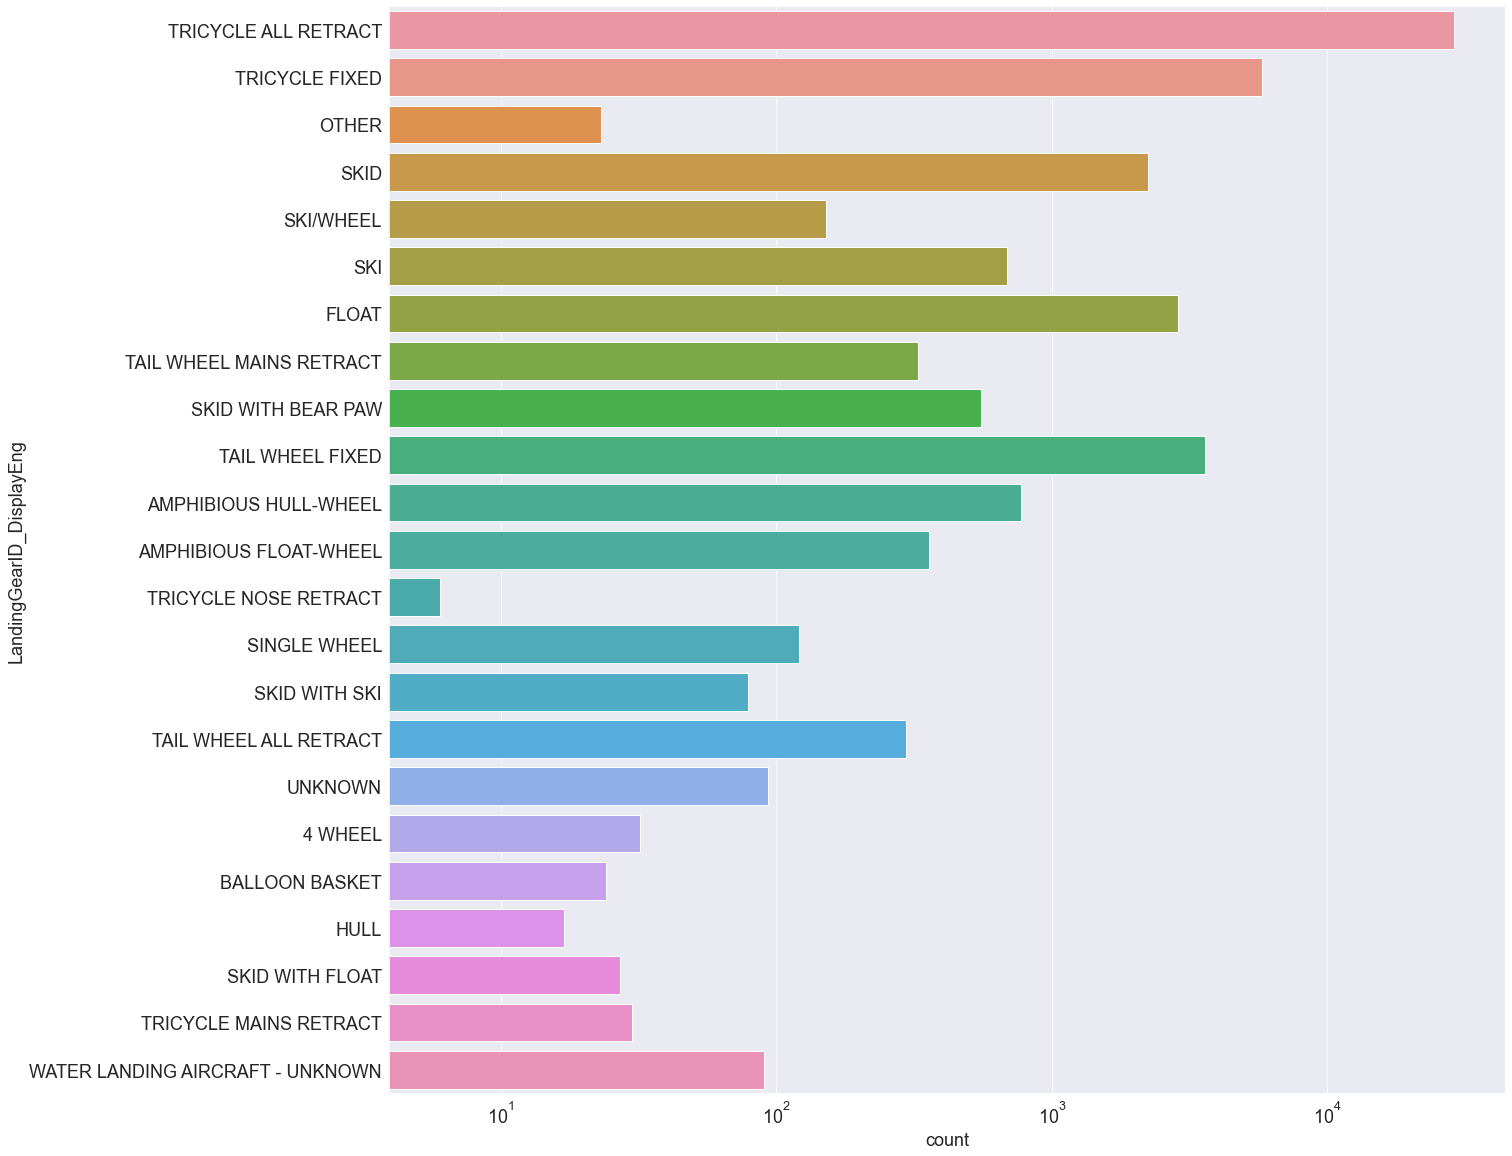

In [326]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'LandingGearID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));
fig.set_xscale("log");

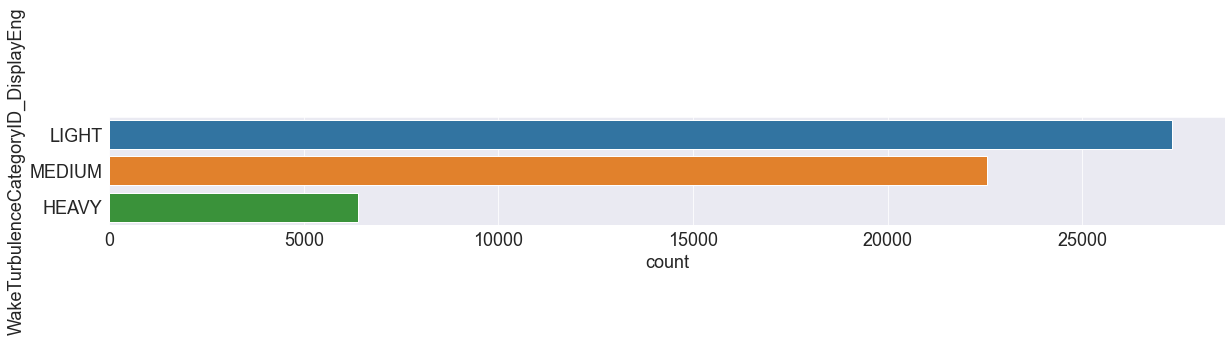

In [328]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'WakeTurbulenceCategoryID_DisplayEng'
fig = sns.countplot(y=column,data = aircraft_df[aircraft_df[column]!='UNKNOWN'].dropna(subset=[column]));

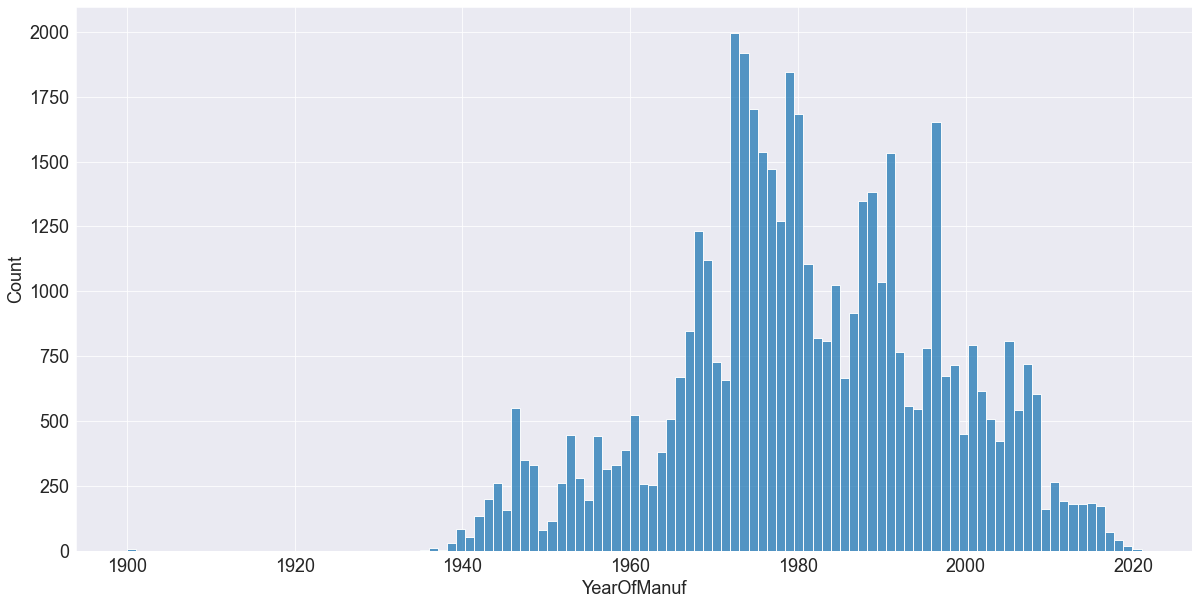

In [332]:
def clean_YoM(txt):
    txt = str(txt)
    if len(txt)==4 and txt[0]!=' ':
        return int(txt)
    elif len(txt)==6:
        return int(txt[:-2])

column = 'YearOfManuf'
aircraft_df[column] = aircraft_df[column].apply(clean_YoM)
matplotlib.rcParams['figure.figsize'] = (20, 10)
fig = sns.histplot(x=column, data = aircraft_df.dropna(subset=[column]));


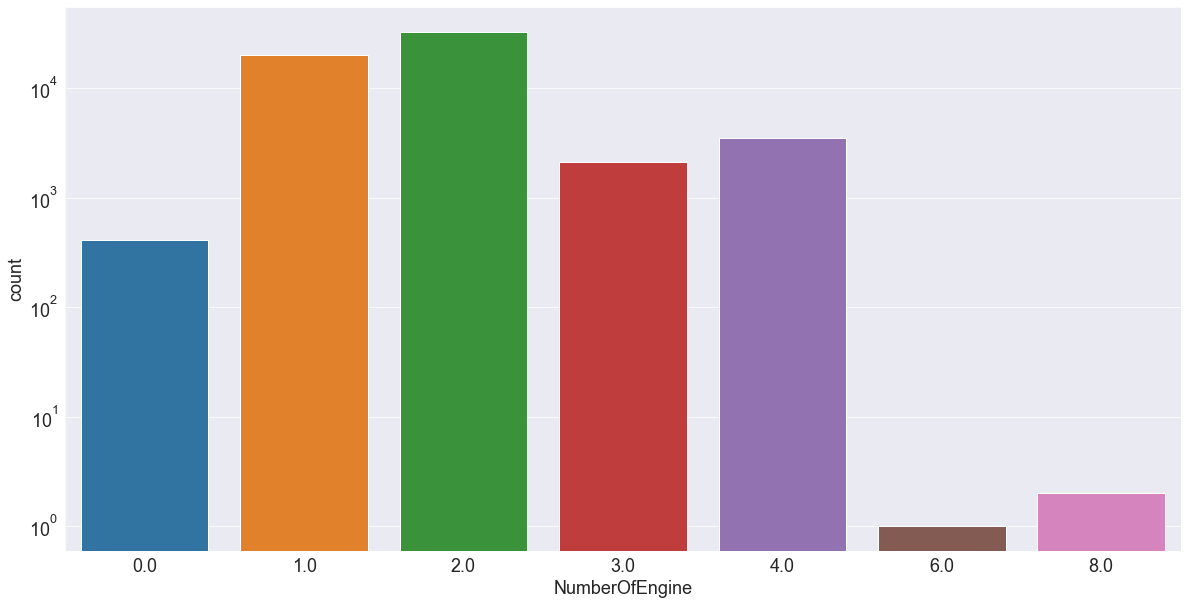

In [333]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'NumberOfEngine'
fig = sns.countplot(x=column, data = aircraft_df.dropna(subset=[column]));
fig.set_yscale("log");

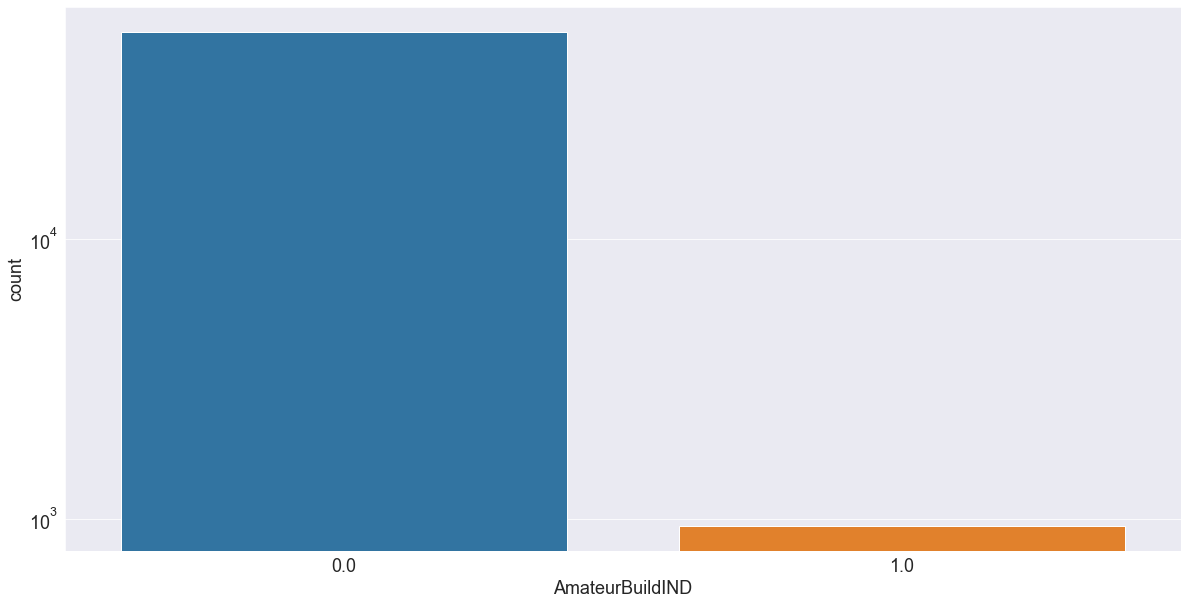

In [334]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'AmateurBuildIND'
fig = sns.countplot(x=column, data = aircraft_df.dropna(subset=[column]));
fig.set_yscale("log");

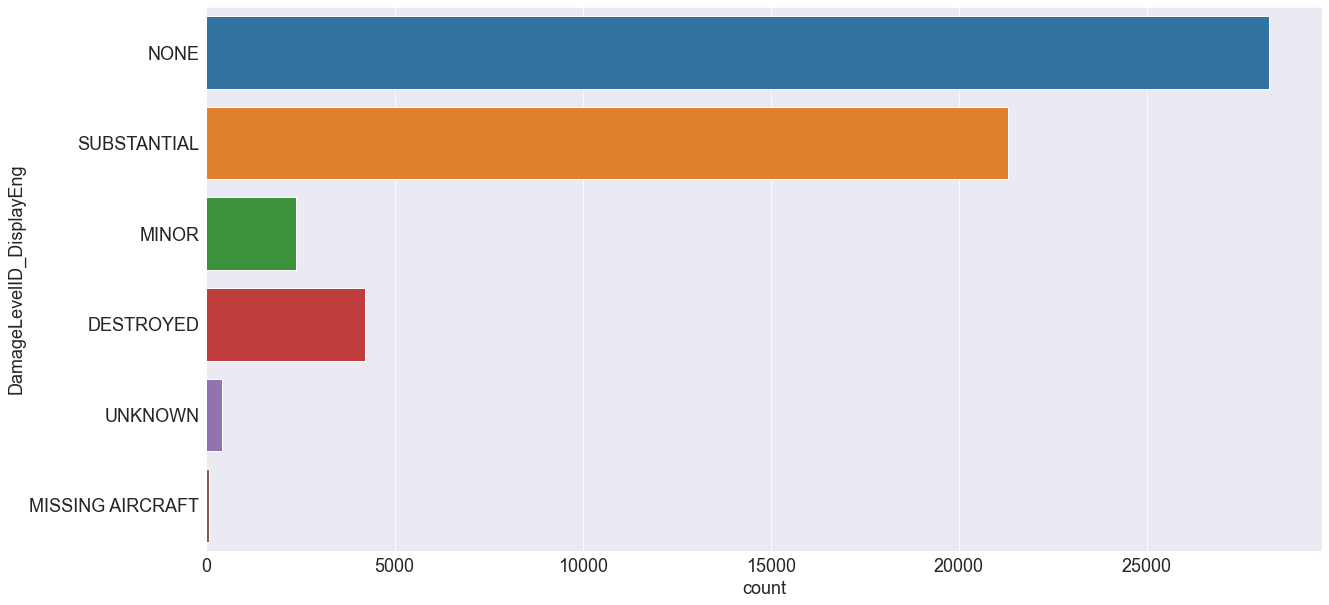

In [335]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'DamageLevelID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

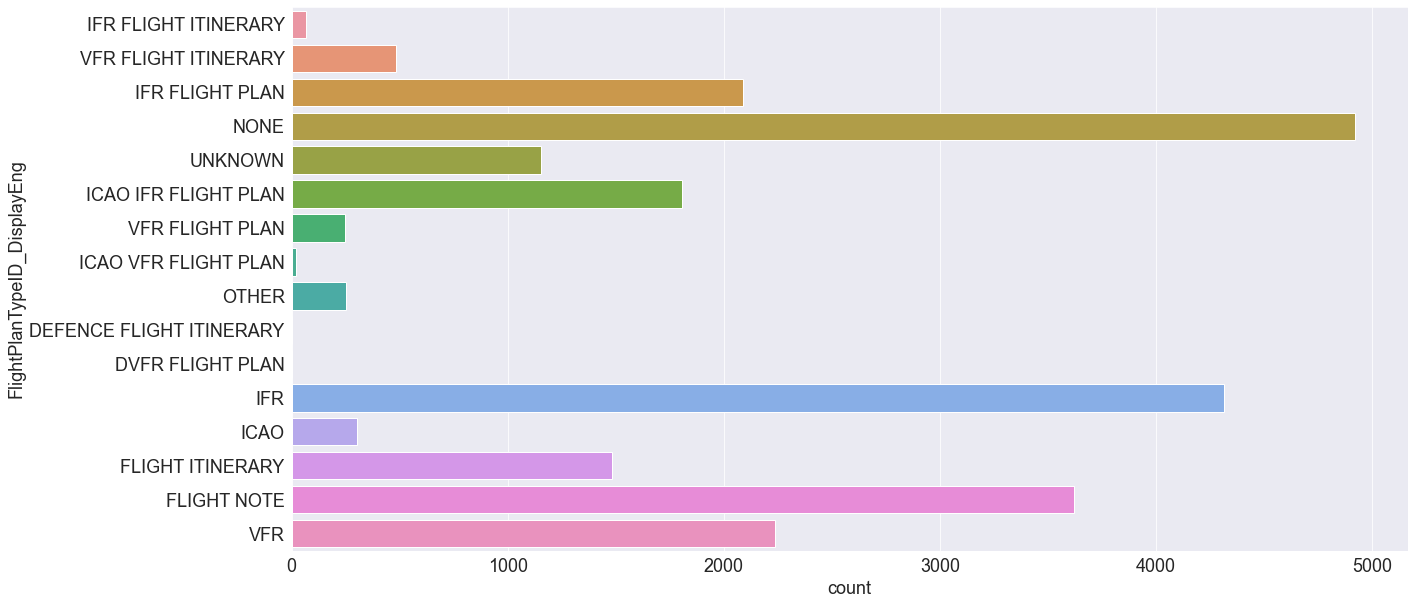

In [336]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'FlightPlanTypeID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

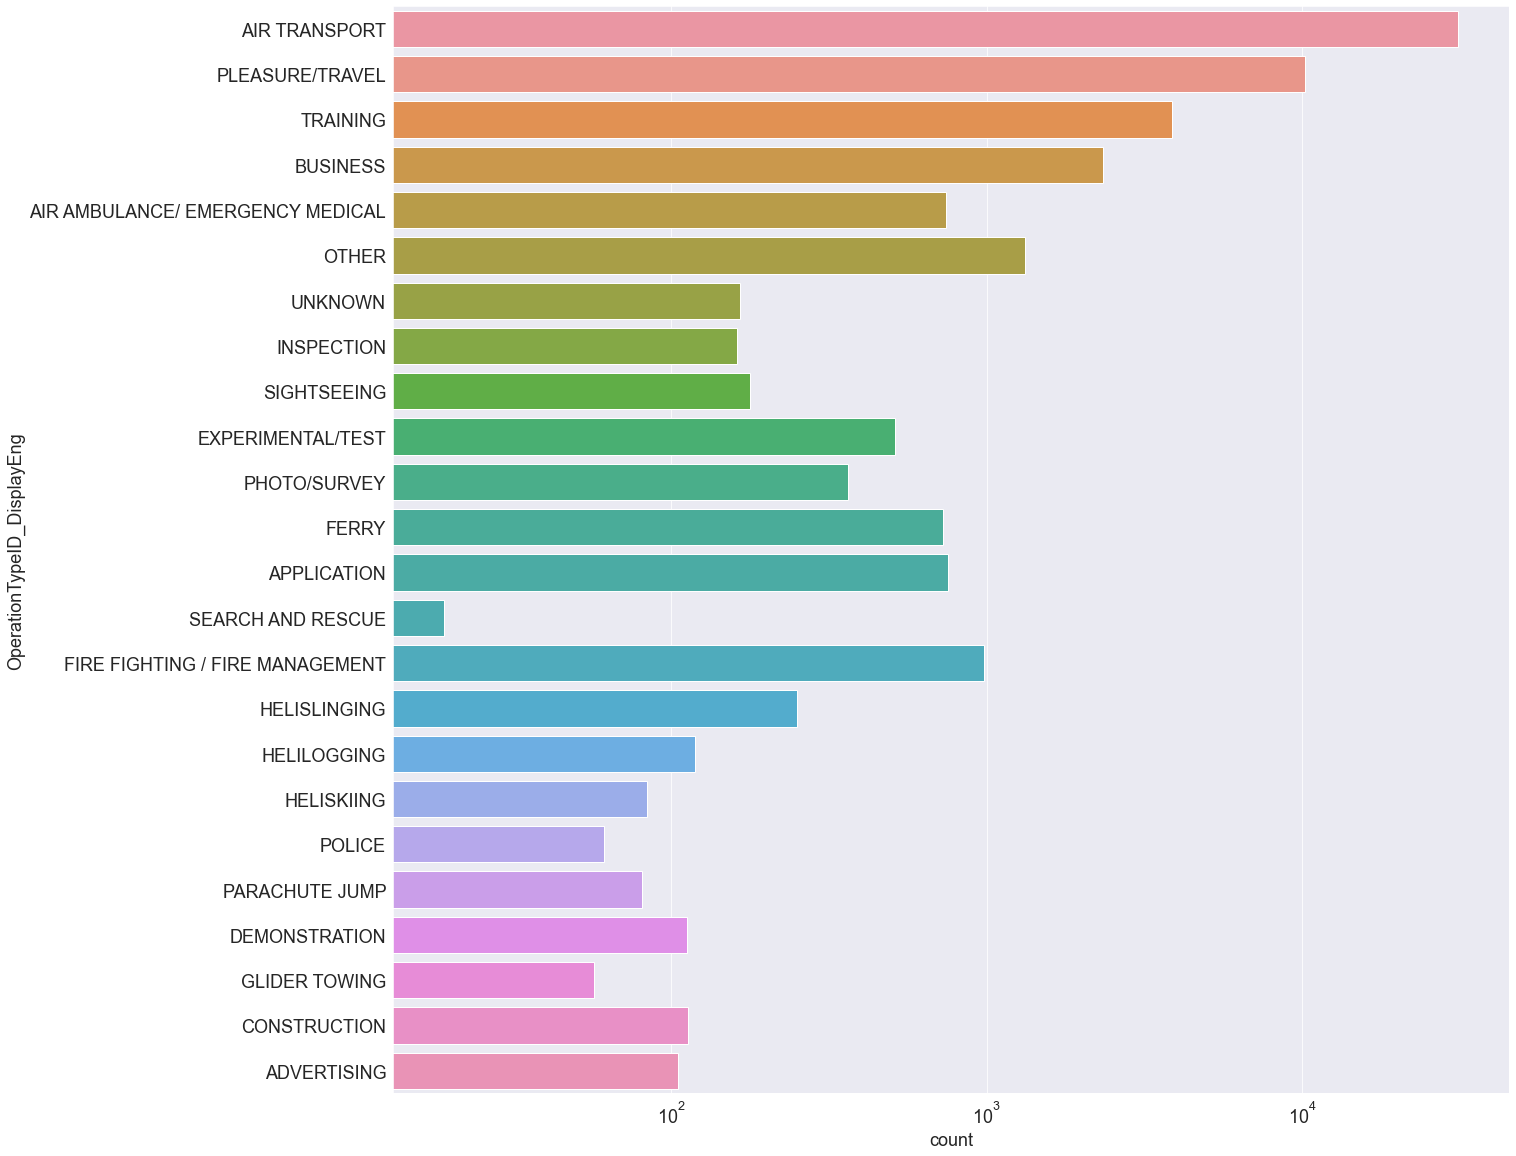

In [337]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'OperationTypeID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));
fig.set_xscale("log");

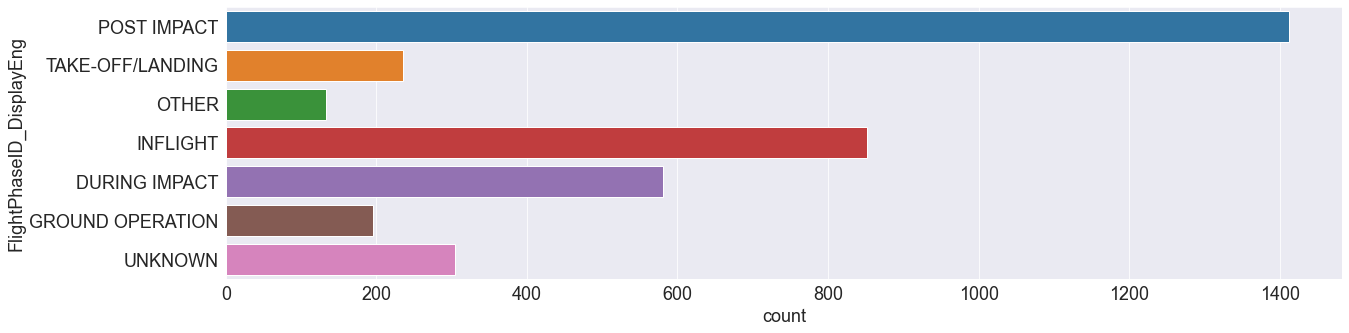

In [338]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'FlightPhaseID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

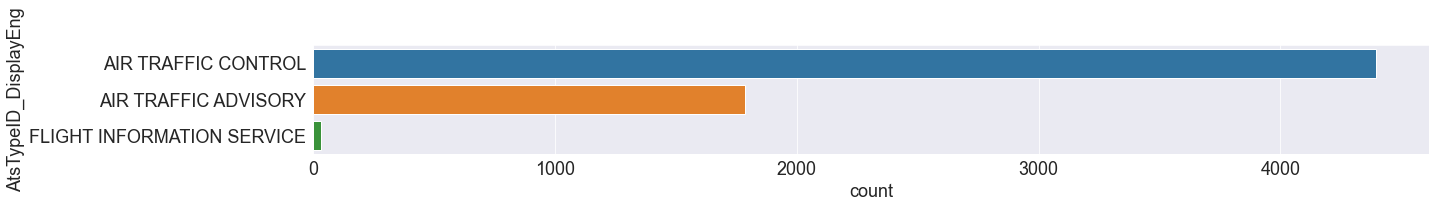

In [339]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'AtsTypeID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

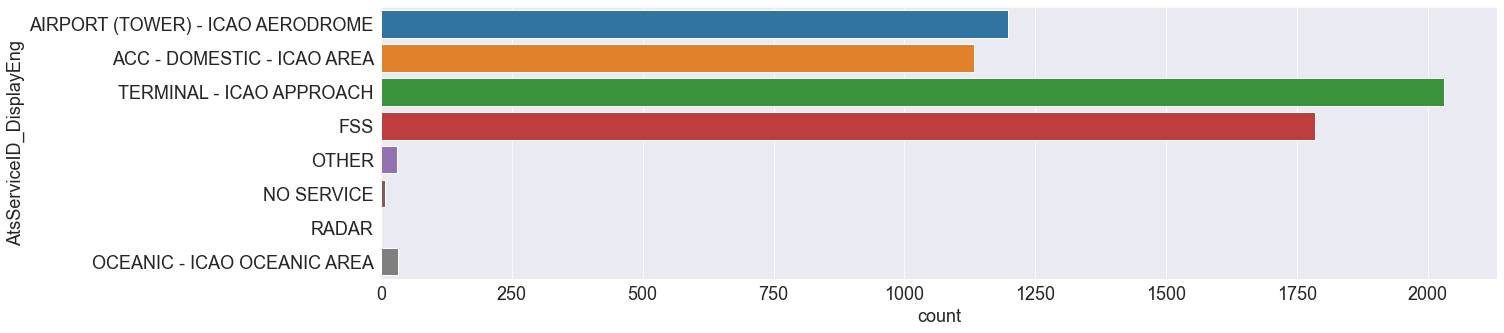

In [340]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'AtsServiceID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

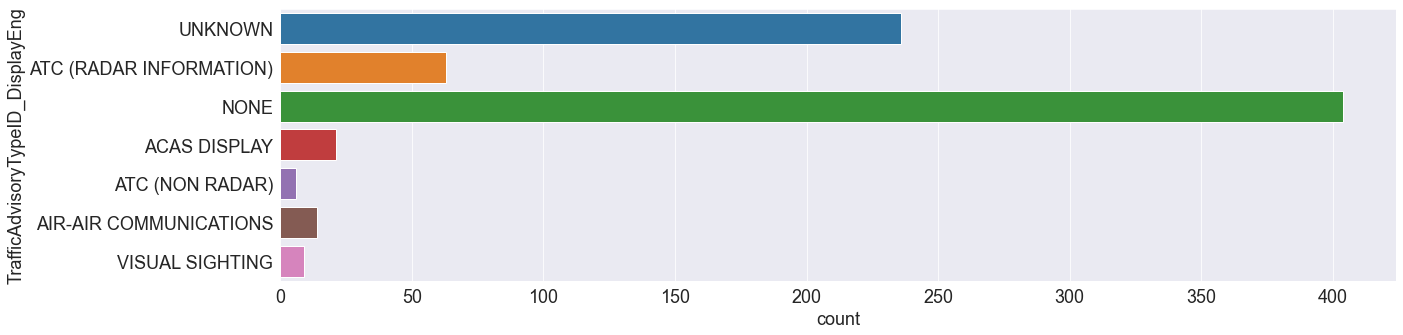

In [341]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'TrafficAdvisoryTypeID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

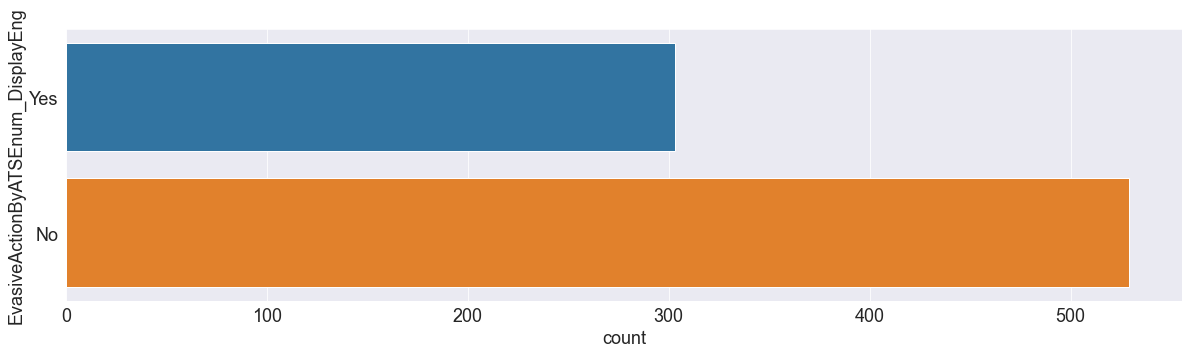

In [344]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EvasiveActionByATSEnum_DisplayEng'
fig = sns.countplot(y=column ,data = aircraft_df[aircraft_df[column]!='Unknown'].dropna(subset=[column]));

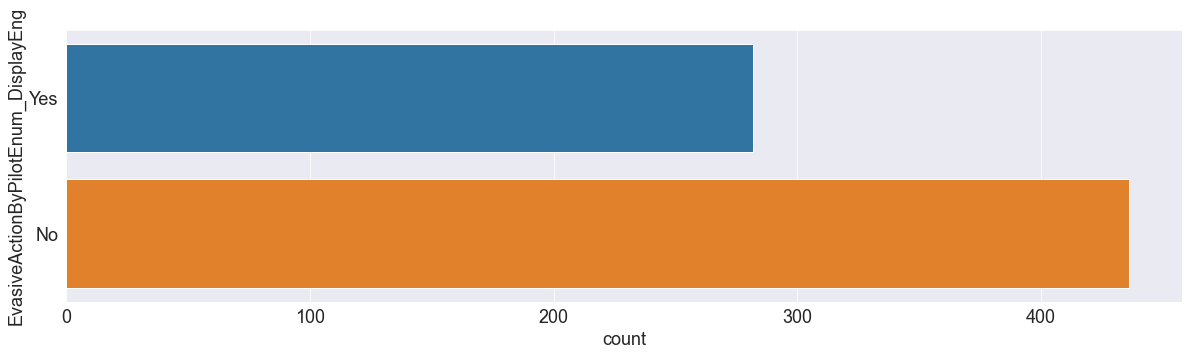

In [345]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EvasiveActionByPilotEnum_DisplayEng'
fig = sns.countplot(y=column,data = aircraft_df[aircraft_df[column]!='Unknown'].dropna(subset=[column]));

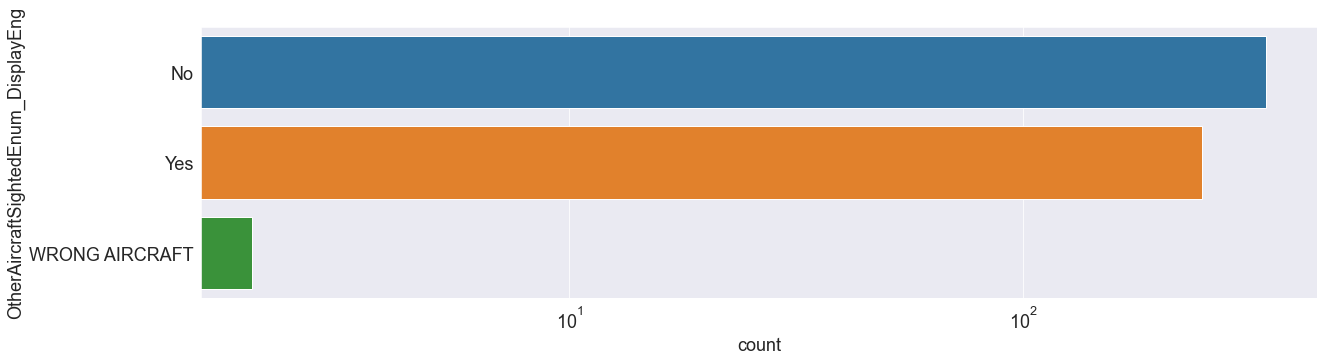

In [347]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OtherAircraftSightedEnum_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));
fig.set_xscale("log");

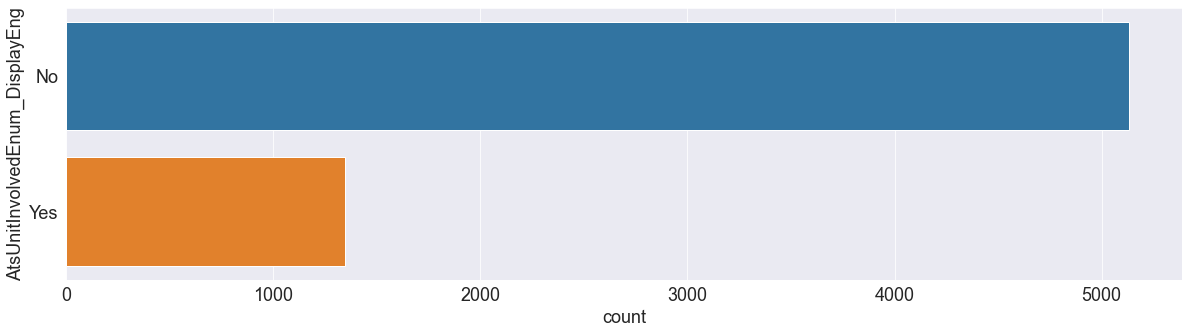

In [348]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'AtsUnitInvolvedEnum_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

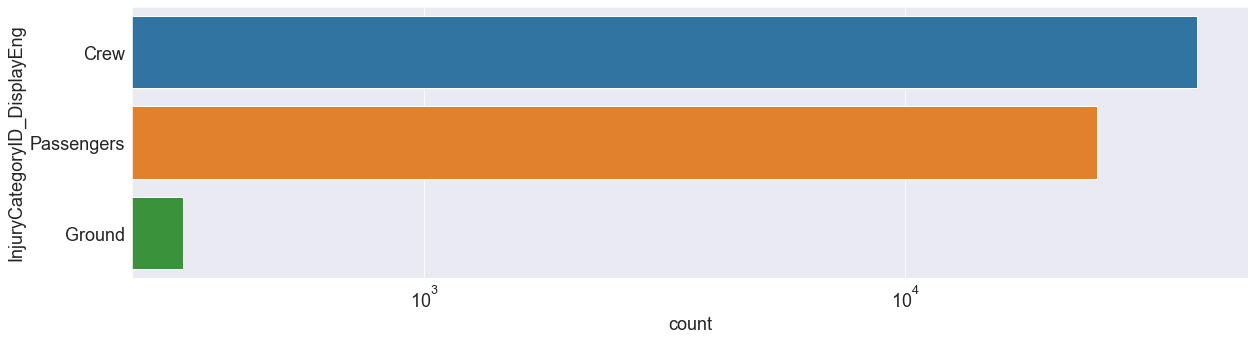

In [350]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'InjuryCategoryID_DisplayEng'
fig = sns.countplot(y=column, data = injuries_df.dropna(subset=[column]));
fig.set_xscale("log");

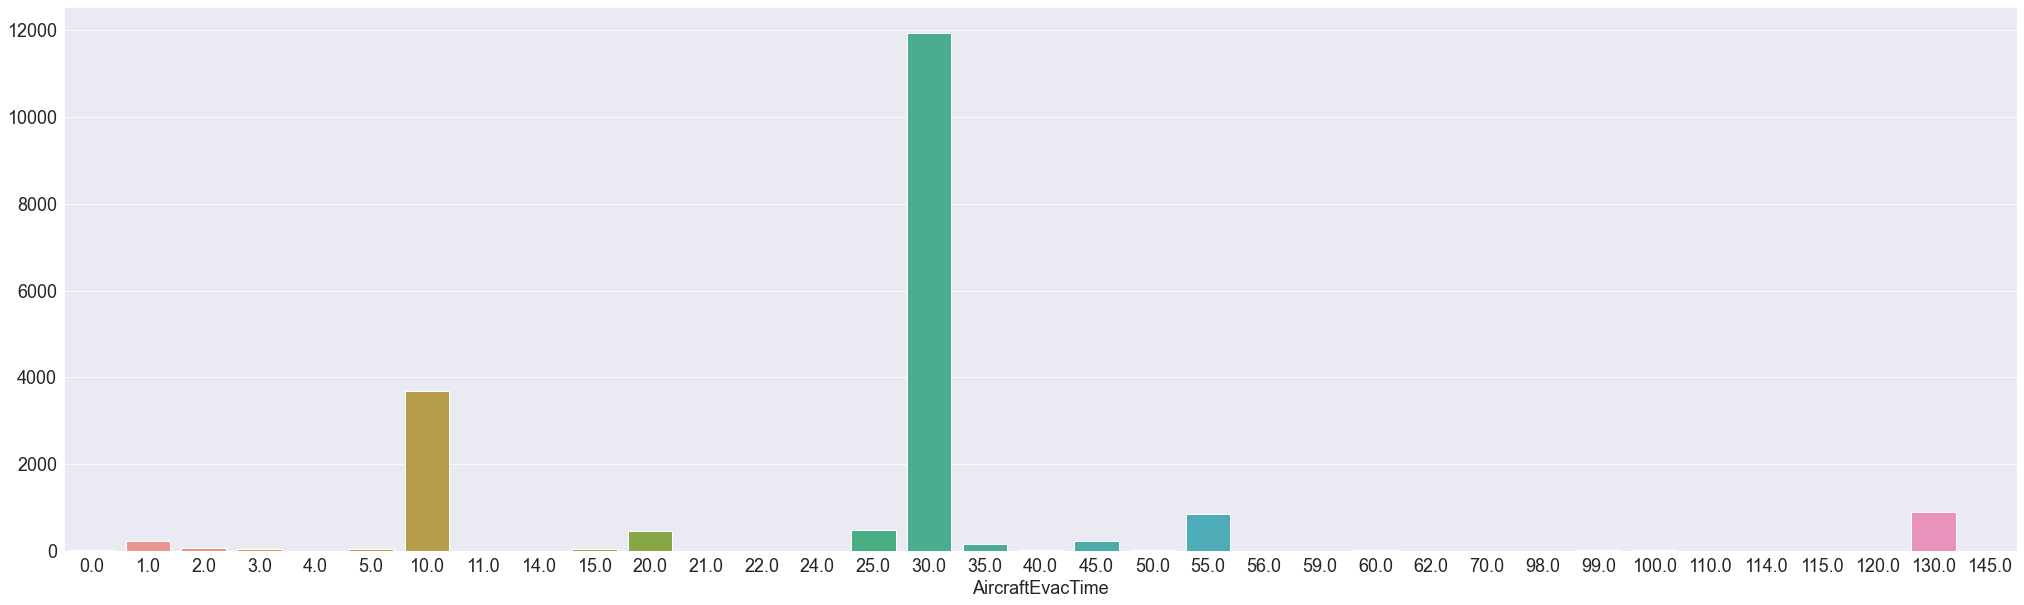

In [169]:
matplotlib.rcParams['figure.figsize'] = (35, 10)
column = 'AircraftEvacTime'
data = survivability_df[survivability_df[column]<150].groupby(column).OccNo.count()
sns.barplot(x = data.index, y = data.values);

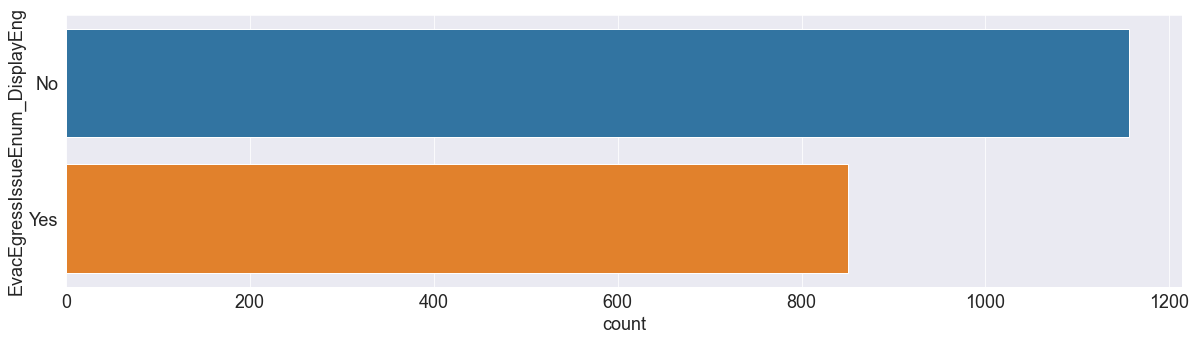

In [352]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EvacEgressIssueEnum_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

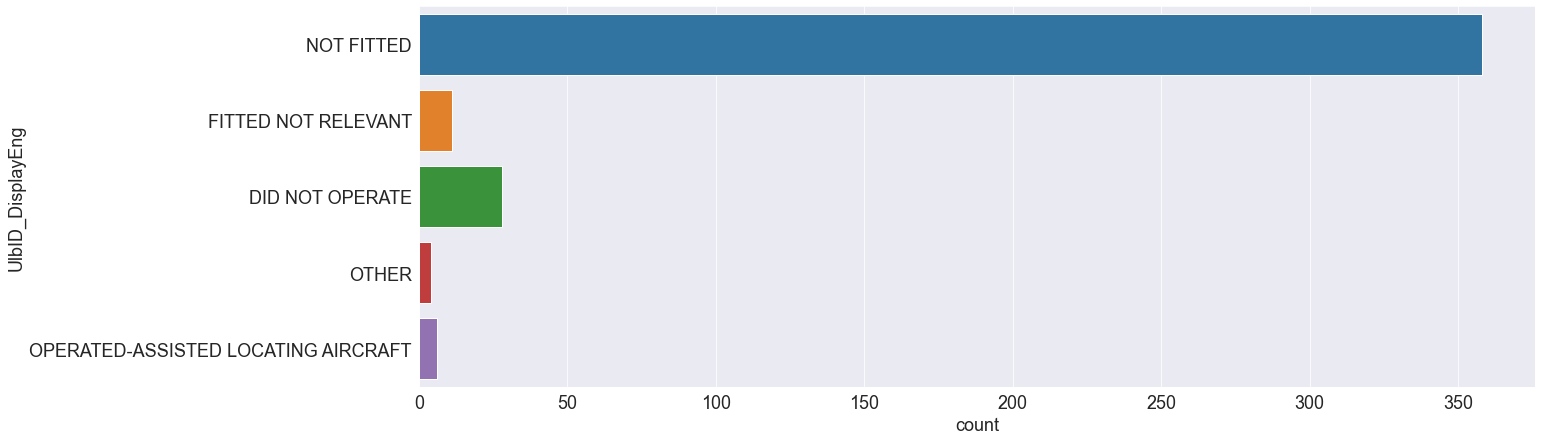

In [356]:
matplotlib.rcParams['figure.figsize'] = (20, 7)
column = 'UlbID_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='UNKNOWN'].dropna(subset=[column]));

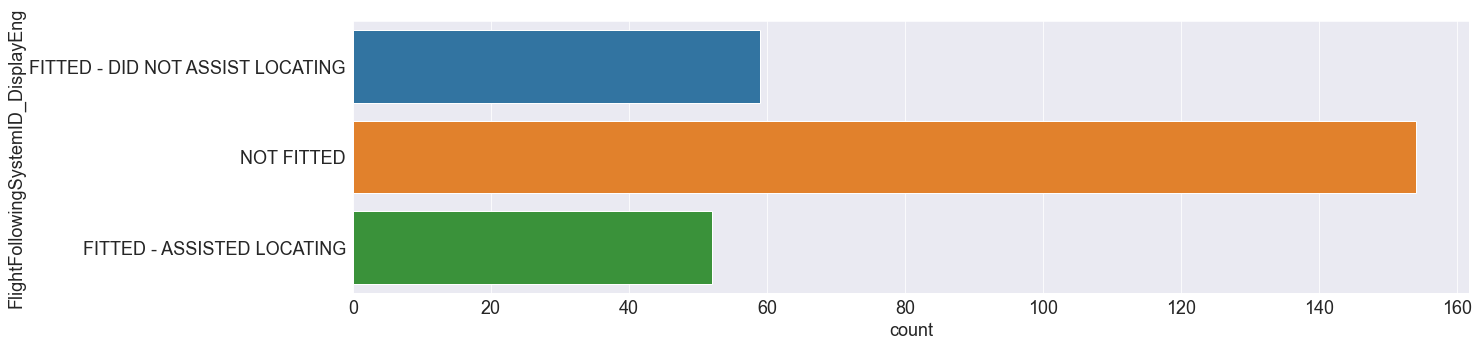

In [357]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'FlightFollowingSystemID_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='UNKNOWN'].dropna(subset=[column]));

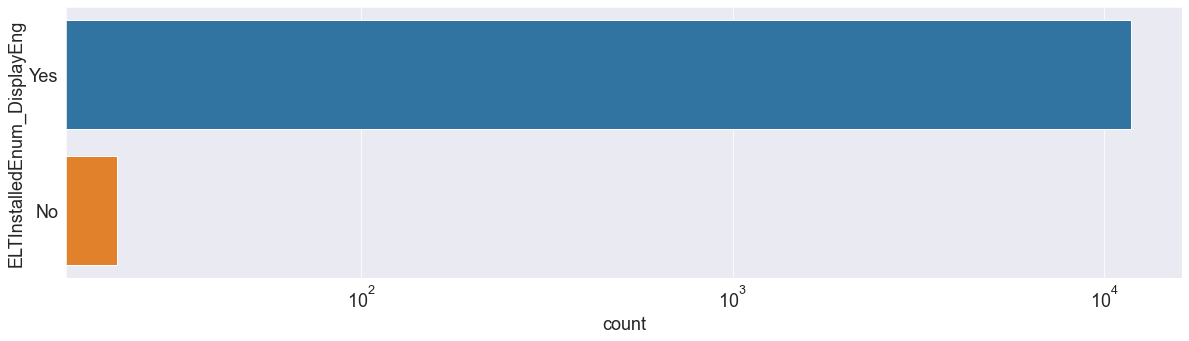

In [358]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'ELTInstalledEnum_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));
fig.set_xscale("log");

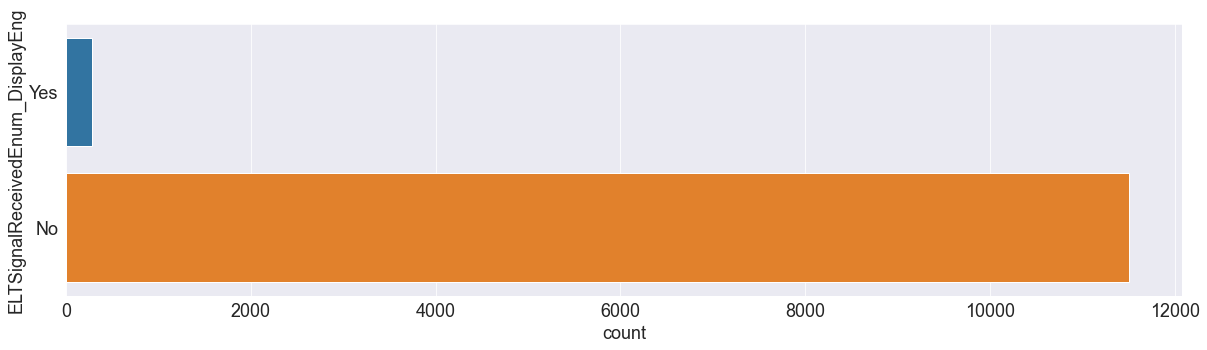

In [360]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'ELTSignalReceivedEnum_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));
#fig.set_xscale("log");

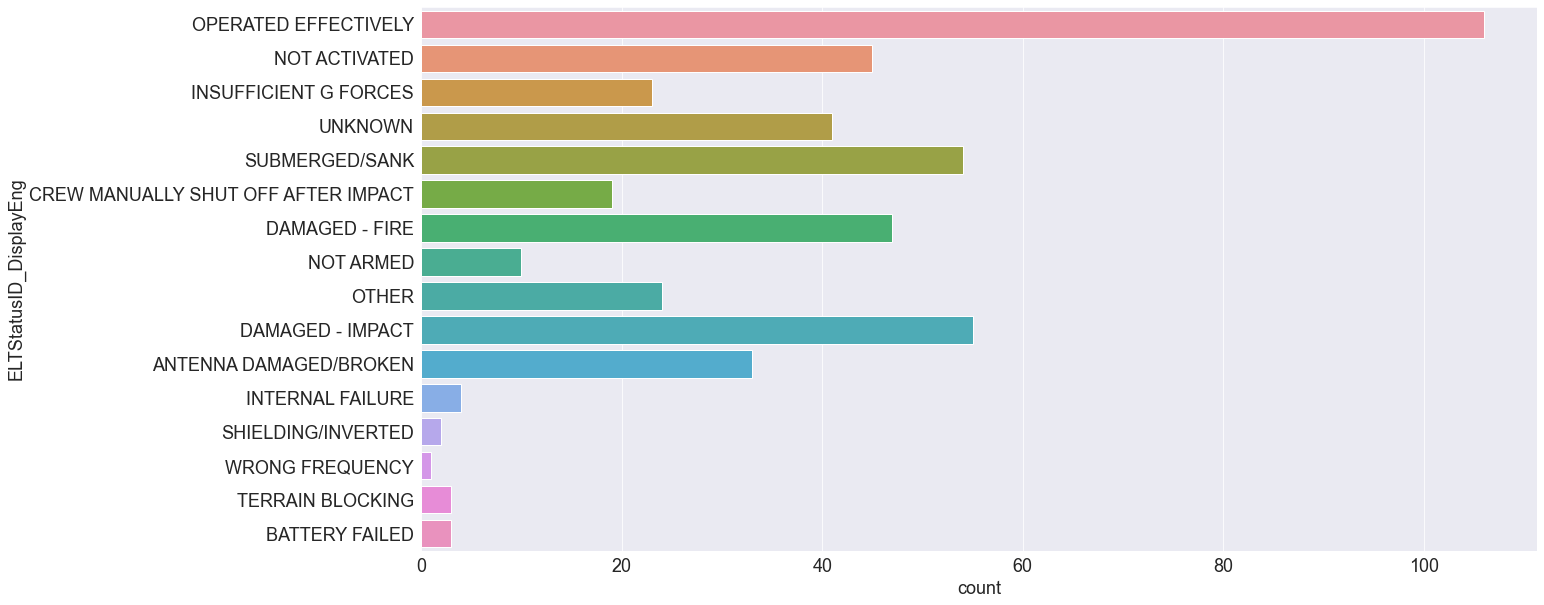

In [361]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'ELTStatusID_DisplayEng'
fig = sns.countplot(y=column, data = survivability_df.dropna(subset=[column]));


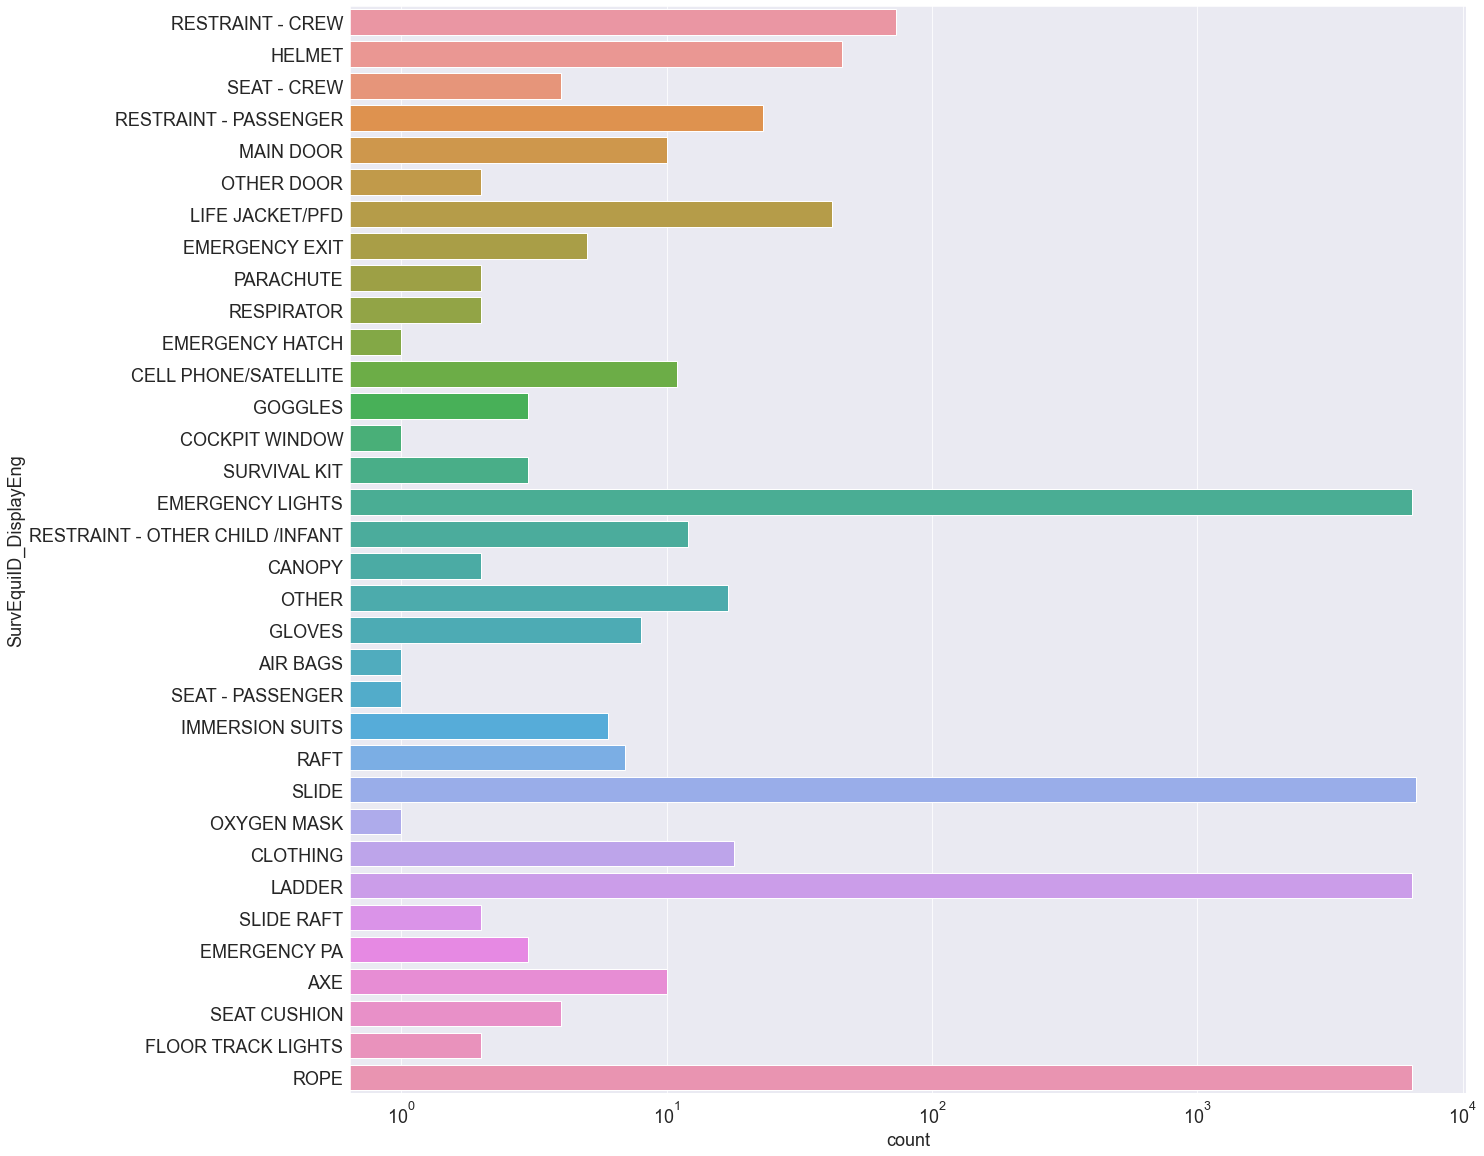

In [363]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'SurvEquiID_DisplayEng'
fig = sns.countplot(y=column, data = survivability_df.dropna(subset=[column]));
fig.set_xscale("log");

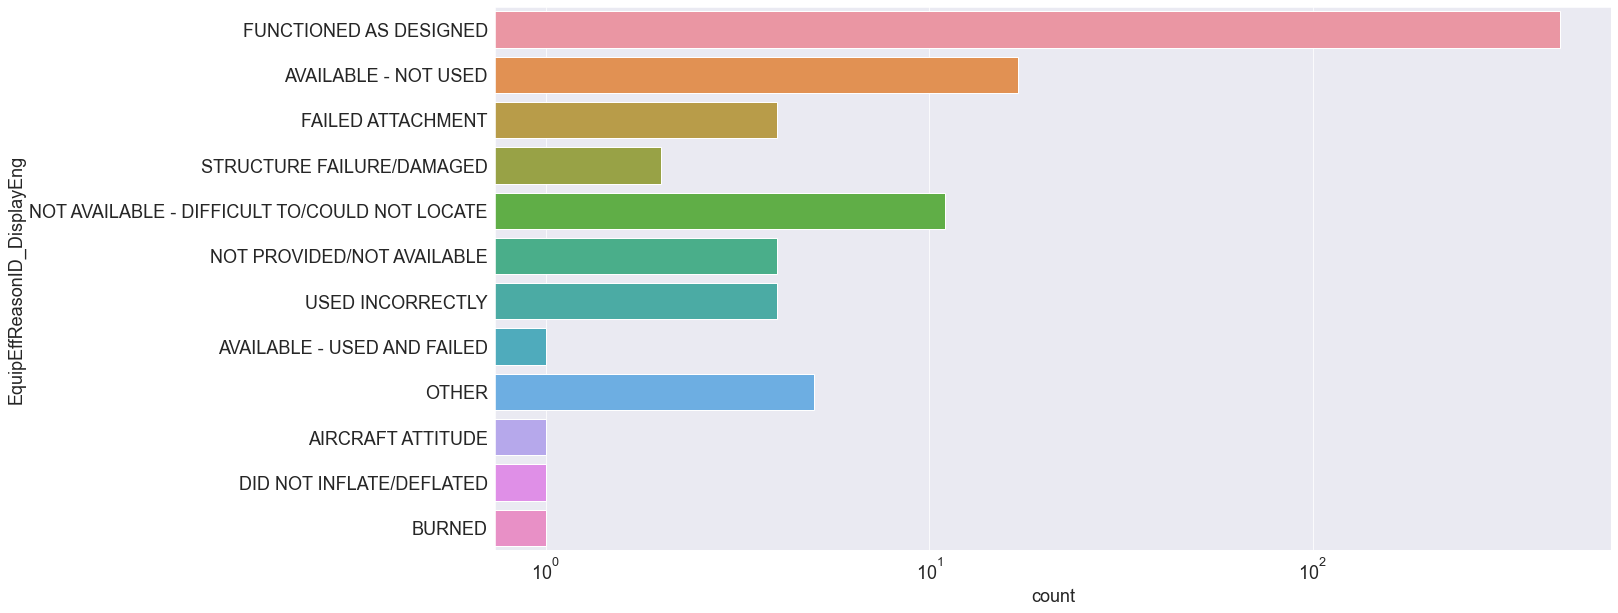

In [364]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'EquipEffReasonID_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='UNKNOWN'].dropna(subset=[column]));
fig.set_xscale("log");

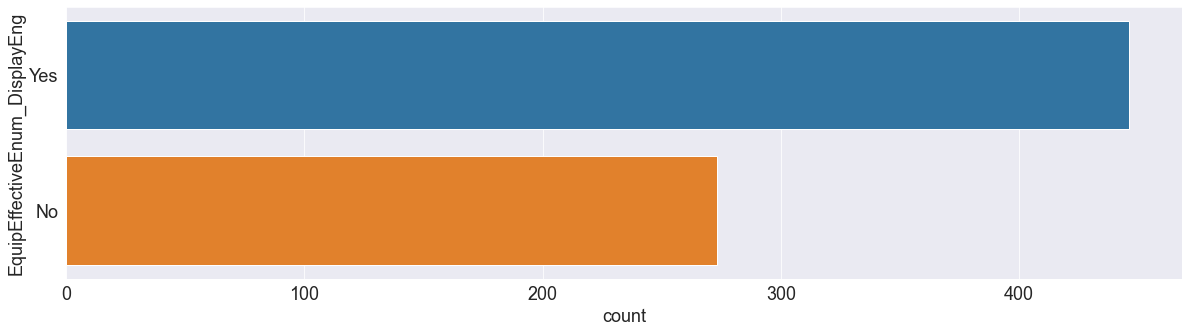

In [365]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EquipEffectiveEnum_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

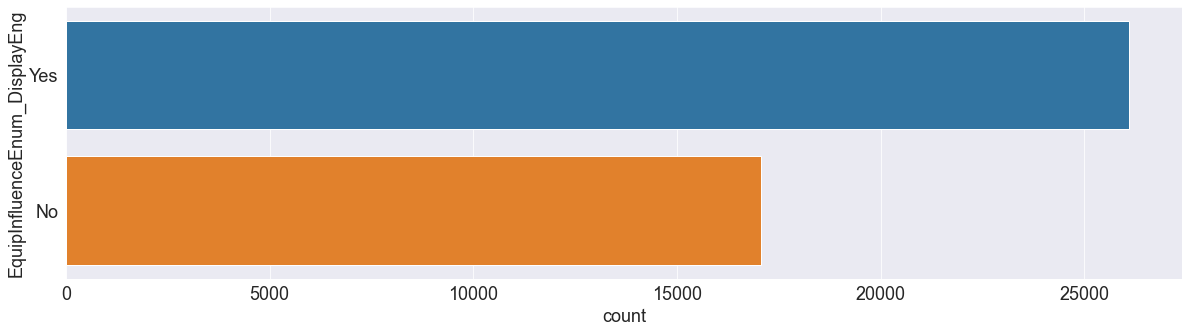

In [374]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EquipInfluenceEnum_DisplayEng'
survivability_df[column] = survivability_df.fillna({column:'No'})[column]
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

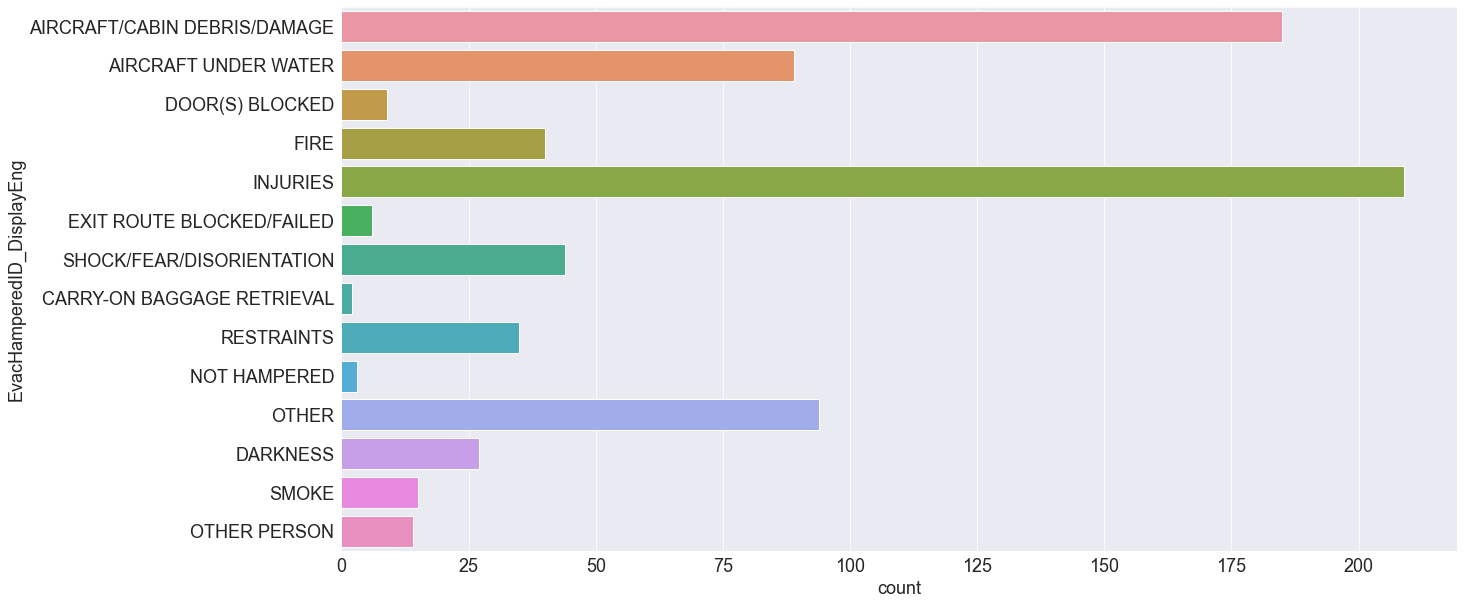

In [375]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'EvacHamperedID_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='UNKNOWN'].dropna(subset=[column]));